### **0. LIBRARY & DATASET IMPORTS**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")

In [11]:
df_bmw.head(3)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01


In [12]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [13]:
df_bmw.shape

(4843, 18)

In [14]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

It can be seen that a lot of boolean variables are actually set as Dtype 'object', the reason for that is the null values in the registers.

### **1. DATASET PREPARATION**

#### **1.1 CHECK - DUPLICATED VALUES**

First task will be check the potential dupplicated values. **There are not dupplicated values**.

In [15]:
df_bmw[df_bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


#### **1.2 CHECK - NULL VALUES**

In [16]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

* Before starting, we will generate a **copy of the database**, in which the data cleaning project will be performed:

In [17]:
df_bmw1=df_bmw.copy()

##### **1.2.1 COLUMN: 'marca' - .fillna & del()**

In [18]:
df_bmw1['marca'].value_counts()

marca
BMW    3873
Name: count, dtype: int64

All values ​​are 'BMW' and the name of the table and kind of vehicle series also appears to be about BMW vehicles, so it can be assumed that the 'NaN' values ​​will also be BMW.

In [19]:
df_bmw1['marca'].fillna('BMW', inplace=True)

C:\Users\aleix\AppData\Local\Temp\ipykernel_5480\3161122400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw1['marca'].fillna('BMW', inplace=True)


* This column can be **deleted**, as it will not contribute to the model:

In [20]:
del(df_bmw1['marca'])

##### **1.2.2 COLUMN: 'modelo' .fillna('Undetermined')**

There are only 3 null values on the dataset in the string column 'modelo'. As the other row information can be useful, it will momentarily give them a value of 'Undetermined'.

In [21]:
df_bmw1['modelo'].isnull().sum()

3

In [22]:
df_bmw1[df_bmw1['modelo'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [23]:
df_bmw1['modelo'].fillna('Undetermined', inplace=True)

C:\Users\aleix\AppData\Local\Temp\ipykernel_5480\542723988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw1['modelo'].fillna('Undetermined', inplace=True)


##### **1.2.2.1 FEATURE ENGINEERING: COLUMN ['serie']**

The ['modelo'] column includes 77 different kind of values, being some of them quite similar and some of them quite unique, making the feature too wide and noisy. To solve this issue and reduce a potential future overfitting, the vehicles will be condensed according to their series, with the new column ['series'], which will appear from a maping of a pre-set dictionary with the series and models classified.

This new variable could be useful, as it simplies the model into series, and those series are also quite related to the dependent variable of price ['precio'].

In [24]:
len(df_bmw1['modelo'].value_counts())

77

In [25]:
df_bmw1['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', 'Undetermined', '525',
       '530', '535', '320 Gran Turismo', '518', '116', '328', '523', 'X3',
       'M550', '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

* **DATA AGGRUPATION**

To create a new column, first the vehicles models will be organized according to their series. This can be done with a **dictionary** and a **list of values**:

In [26]:
serie_types={
  'serie_1':['118','120','135','116','125','114','M135','123',],
  'serie_2':['220','218','225','M235','218 Active Tourer', '218 Gran Tourer', '216','220 Active Tourer', '216 Gran Tourer', '216 Active Tourer','225 Active Tourer', '214 Gran Tourer','Active Tourer'],
  'serie_3':['M3','320','335','325','330','316','320 Gran Turismo','328','325 Gran Turismo','318 Gran Turismo','330 Gran Turismo','335 Gran Turismo','318',],
  'serie_4':['M4','420','425','430','435','435 Gran Coupé','430 Gran Coupé','420 Gran Coupé','418 Gran Coupé',],
  'serie_5':['520','530', '535','518','523','M550','528','518','520 Gran Turismo','530 Gran Turismo','535 Gran Turismo','M5','ActiveHybrid 5','525'],
  'serie_6':['650','640','640 Gran Coupé','630','635'],
  'serie_7':['730','740', '750','735'],
  'serie_x':['X3','X5', 'X1', 'X4', 'X6', 'X6 M','X5 M', 'X5 M50'],
  'serie_z':['Z4'],
  'serie_i':['i8','i3']
}

**Function generation and applyment:**

In [27]:
def check_serie(model):
  for i,j in serie_types.items():
    if model in j:
      return i
  else:
      return 'Undetermined'

In [28]:
df_bmw1['series']=df_bmw1['modelo'].apply(check_serie)

Tbe ultimate step will be deleting the ['modelo'] column, but this will not be performed until the end of the data cleaning process, as its values can be useful to fill null values.

##### **1.2.3 COLUMN:'km'.loc, ['modelo'] y ['fecha_venta'] .mean()**

In the case of 'km', there are only 2 null values. As is numeric column, it will be tried to input values based in other variables that are known and could be related. With the information available, is possible to guess an aproximate value with the car model and year it was sold. Therefore:

*  Average with vehicles with the same ['modelo'] & ['fecha_venta']

In [32]:
df_bmw1[df_bmw1['km'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series


In [30]:
#FECHA_VENTA to Dataframe
df_bmw1['fecha_venta'] = pd.to_datetime(df_bmw1['fecha_venta'])

In [31]:
for i in df_bmw1.index:
    if pd.isnull(df_bmw1.loc[i, 'km']):
        n_model=df_bmw1.loc[i, 'modelo']
        n_syear=df_bmw1.loc[i, 'fecha_venta'].year

        mean_km = df_bmw1[(df_bmw1['modelo'] == n_model) & (df_bmw1['fecha_venta'].dt.year == n_syear)]['km'].mean()
        
        df_bmw1.loc[i, 'km'] = round(mean_km, 0)
    else:
        continue


##### **1.2.4 COLUMN: 'potencia' (fillna with median of the model)**

There is only one null value in ['potencia']. To solve this we can base ourselves on the vehicle model, since the power of a vehicle should be related with its model. In the case, the model is '525', there being 13 values ​​of it. To avoid outliers values ​​or values ​​with decimals, **median** can be chosed.

In [ ]:
df_bmw1[df_bmw1['potencia'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series


In [ ]:
df_bmw1[df_bmw1['modelo'] == '525'].value_counts().sum()

13

In [ ]:
model_525_med = df_bmw1[df_bmw1['modelo'] == '525']['potencia'].median()
df_bmw1['potencia'].fillna(model_525_med, inplace=True)

##### **1.2.5 COLUMNS: 'fecha_registro' & 'fecha_venta'**

There are a large number of null values ​​in the 'fecha_registro' column, close to 50%. We will try to assign approximate values, since this record is necessary for the column ['fecha_venta'] that we want to generate.

First it will be generated a column that allows to calculate the difference between both columns, assignging the median of the model (in years) for the null values.

After that, with feature engineering, it will be generated two new columns that resume the date columns yearly, the null values of the ['fecha_registro'] will disappear, as to create the equivalent column it will be used the new one with the difference.

In [ ]:
df_bmw1['fecha_registro'].isnull().value_counts()

fecha_registro
True     2423
False    2420
Name: count, dtype: int64

In [ ]:
df_bmw1.head(1)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,serie_1


In [ ]:
#TRANSFORM TO DATETIME
df_bmw1['fecha_registro'] = pd.to_datetime(df_bmw1['fecha_registro'])
df_bmw1['fecha_venta'] = pd.to_datetime(df_bmw1['fecha_venta'])

df_bmw1['time_difference'] = (df_bmw1['fecha_venta'] - df_bmw1['fecha_registro']) / pd.Timedelta(days=30)

In [ ]:
df_bmw1['fecha_registro'] = df_bmw1['fecha_registro'].dt.strftime('%Y-%m')
df_bmw1['fecha_venta'] = df_bmw1['fecha_venta'].dt.strftime('%Y-%m')

In [ ]:
df_bmw1.head(5)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,time_difference
0,118,140411.0,100.0,2012-02,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01,serie_1,6.00
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02,serie_4,3.72
2,320,183297.0,120.0,2012-04,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02,serie_3,5.92
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02,serie_4,3.72
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04,serie_4,3.72


* **FEATURE ENGINEERING** - year

In [ ]:
dict_time = df_bmw1.groupby('series')['time_difference'].median().to_dict()

In [ ]:
df_bmw1['time_difference'] = df_bmw1['time_difference'].fillna(df_bmw1['series'].map(dict_time))
df_bmw1['time_difference'] = round(df_bmw1['time_difference']/12,2)

In [ ]:
df_bmw1['fecha_venta'] = pd.to_datetime(df_bmw1['fecha_venta'])
df_bmw1['year_sale'] =df_bmw1['fecha_venta'].dt.year
df_bmw1['year_sale'] = pd.to_numeric(df_bmw1['year_sale'])
df_bmw1['year_register'] = round(df_bmw1['year_sale'] - df_bmw1['time_difference'],0)

* **DELETE COLUMNS & NULL ROW**

In [ ]:
del(df_bmw1['fecha_registro'])
del(df_bmw1['fecha_venta'])

In [ ]:
df_bmw1.dropna(subset=['year_sale'],inplace=True)

* **CHANGE DATATYPE TO INT**

In [ ]:
df_bmw1['year_sale']=df_bmw1['year_sale'].astype('int')
df_bmw1['year_register']=df_bmw1['year_register'].astype('int')

##### **1.2.6 COLUMN: 'tipo_gasolina' - .replace(), .fillna() with .mode()**

After analyzing the gasoline type column **['tipo_gasolina']**, it can be seen that there are two types of values ​​for the same element **'Diesel' and 'diesel'**, so they will have to be unified. In the same sense, given the overwhelming majority of this record, the 5 **null values** will be categorize ​as **'diesel'**.

In [ ]:
df_bmw1['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4630
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [ ]:
df_bmw1['tipo_gasolina'].isnull().sum()

5

In [ ]:
df_bmw1[df_bmw1['tipo_gasolina'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,time_difference,year_sale,year_register
82,420,54993.0,135.0,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,serie_4,3.72,2018,2014
185,320,186697.0,135.0,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,serie_3,5.49,2018,2013
444,318,111622.0,100.0,NaN,black,estate,True,True,False,NaN,False,False,True,True,15400.0,serie_3,5.16,2018,2013
480,318,170350.0,105.0,NaN,white,NaN,False,True,False,NaN,False,False,True,False,10200.0,serie_3,4.90,2018,2013
630,318,147558.0,105.0,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,serie_3,3.38,2018,2015


* **ASIGN MODE**

In [ ]:
#OBTAIN A LIST WITH THE MODELS 'modelo' WITH NULL VALUES
df_bmw1_tgn_ = df_bmw1[df_bmw1['tipo_gasolina'].isnull()]
tgn_list_ = df_bmw1_tgn_['modelo'].unique().tolist()

In [ ]:
#CHECK VALUES
df_bmw1[df_bmw1['modelo'].isin(tgn_list_)]['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    1301
petrol      54
Diesel       4
Name: count, dtype: int64

In [ ]:
#OBTAIN & APPLY MODE
mode_tipo_gasolina_ = df_bmw1[df_bmw1['modelo'].isin(tgn_list_)]['tipo_gasolina'].mode()[0]
df_bmw1['tipo_gasolina'].fillna(mode_tipo_gasolina_,inplace=True)

* **REPLACE**

In [ ]:
df_bmw1['tipo_gasolina'].replace('Diesel', 'diesel', inplace=True)

In [ ]:
df_bmw1['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4640
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

##### **1.2.7 COLUMN: 'color' .fillna('Undetermined')**

In the case of 'color' there is a notable set of null values ​​(445), this being in principle an independent variable that is not correlated by other factors, making it difficult to attribute, taking into account that there are many colors without clear dominance.

Consequently, a variable that is **'Undetermined'** will be generated in the meantime.

In [ ]:
df_bmw1['color'].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [ ]:
df_bmw1['color'].isnull().value_counts()

color
False    4397
True      445
Name: count, dtype: int64

In [ ]:
df_bmw1['color'].fillna('Undetermined', inplace = True)

In [ ]:
df_bmw1['color'].value_counts()

color
black           1499
grey            1070
blue             647
white            484
Undetermined     445
brown            302
silver           291
red               47
beige             37
green             14
orange             6
Name: count, dtype: int64

##### **1.2.8 COLUMN: 'tipo_coche' .mode()**

In the case of car types, there is a large multitude of nulls (1460). A way to solve this would be to search according to the car model and assign them a type of vehicle.

Instead of creating a new category with 'Undetermined', as many models coincide with a vehicle type (totally or largely), the decided solution will be to **impute the mode** to each according to the vehicle model.

In [ ]:
df_bmw1['tipo_coche'].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [ ]:
df_bmw1['tipo_coche'].isnull().sum()

1459

In [ ]:
df_bmw1.loc[df_bmw1['tipo_coche'].isnull(), 'modelo'].unique()

array(['118', '320', '425', '335', '325', '420', 'Z4', '220', '430',
       '120', '650', 'M3', '218', 'M4', '640', 'M235', '430 Gran Coupé',
       '520', '318', '316', 'Undetermined', '525', '330', '530', '535',
       '320 Gran Turismo', '518', 'M550', '328', 'X3', '523', '116', 'i3',
       '318 Gran Turismo', '530 Gran Turismo', '420 Gran Coupé', '114',
       '335 Gran Turismo', '520 Gran Turismo', '435 Gran Coupé',
       '330 Gran Turismo', '418 Gran Coupé', '640 Gran Coupé',
       '535 Gran Turismo', '740', '730', '750', '528', '123', 'X1', 'X5',
       'X6', 'X5 M', 'X4', 'X6 M', '218 Gran Tourer', '218 Active Tourer',
       '216 Gran Tourer'], dtype=object)

In [ ]:
df_bmw1[df_bmw1['modelo'] == '730']['tipo_coche'].value_counts()

tipo_coche
sedan        21
hatchback     1
Name: count, dtype: int64

In [ ]:
#CALCULAR MODA POR MODELO (con ChatGPT):
mode_vehicle = df_bmw1.groupby('modelo')['tipo_coche'].agg(lambda x: x.mode().iloc[0])

#ASIGNAR VALORES (con ChatGPT)
df_bmw1.loc[df_bmw1['tipo_coche'].isnull(), 'tipo_coche'] = df_bmw1[df_bmw1['tipo_coche'].isnull()]['modelo'].map(mode_vehicle)

##### **1.2.9 COLUMN: :'volante_regulable' .mode() for vehicle kind**

In [ ]:
df_bmw1['volante_regulable'].value_counts()

volante_regulable
True     2661
False    2177
Name: count, dtype: int64

In [ ]:
df_bmw1['volante_regulable'].isnull().sum()

4

In [ ]:
df_bmw1[df_bmw1['volante_regulable'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,time_difference,year_sale,year_register
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,serie_3,5.49,2018,2013
273,318,195032.0,100.0,diesel,grey,estate,NaN,NaN,False,False,False,False,True,False,4900.0,serie_3,10.15,2018,2008
489,320,227691.0,135.0,diesel,black,estate,NaN,True,False,False,False,True,True,False,10500.0,serie_3,4.90,2018,2013
614,318,201626.0,105.0,diesel,black,estate,NaN,NaN,False,NaN,True,False,True,True,11700.0,serie_3,4.48,2018,2014


In [ ]:
mode_vehicle = df_bmw1.groupby('modelo')['volante_regulable'].agg(lambda x: x.mode().iloc[0])
df_bmw1.loc[df_bmw1['volante_regulable'].isnull(), 'volante_regulable'] = df_bmw1[df_bmw1['volante_regulable'].isnull()]['modelo'].map(mode_vehicle)

##### **1.2.10 COLUMN: 'aire_acondicionado' .fillna() using mode**

In this case there is a high number of nulls (485). The majority the values are 'True' (80%). In the set of variables analyzed, True always exceeds 'False'. Consequently, it will be decided to impute the mode in this variable.

In [ ]:
df_bmw1['aire_acondicionado'].value_counts()

aire_acondicionado
True     3465
False     891
Name: count, dtype: int64

In [ ]:
df_bmw1['aire_acondicionado'].isnull().sum()

486

In [ ]:
df_bmw1.groupby('series')['aire_acondicionado'].value_counts()

series        aire_acondicionado
Undetermined  True                     2
              False                    1
serie_1       True                   284
              False                  227
serie_2       True                    35
              False                    9
serie_3       True                  1256
              False                  365
serie_4       True                    79
              False                   16
serie_5       True                   983
              False                   62
serie_6       True                    25
              False                    3
serie_7       True                    44
serie_i       True                     6
serie_x       True                   751
              False                  203
serie_z       False                    5
Name: count, dtype: int64

In [ ]:
df_bmw1['aire_acondicionado'].fillna('True',inplace=True)

##### **1.2.11 COLUMN: 'camara_trasera' mode + fillna()**

In the case of **['camara_trasera']** there are only 2 null values, and its case registers are quite complete. Therefore, after checking that most of its series and own models has not this feature, the null values will be filled with the .mode()

In [ ]:
df_bmw1['camara_trasera'].value_counts()

camara_trasera
False    3864
True      976
Name: count, dtype: int64

In [ ]:
df_bmw1[df_bmw1['camara_trasera'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,time_difference,year_sale,year_register
291,520,163675.0,135.0,diesel,Undetermined,estate,True,True,NaN,NaN,True,NaN,True,True,14900.0,serie_5,6.18,2018,2012
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,NaN,True,NaN,True,NaN,11700.0,serie_3,4.90,2018,2013


In [ ]:
print(df_bmw1[df_bmw1['series'] == 'serie_5']['camara_trasera'].value_counts())
print('---')
print(df_bmw1[df_bmw1['series'] == 'serie_3']['camara_trasera'].value_counts())
print('---')
print(df_bmw1[df_bmw1['modelo'] == '520']['camara_trasera'].value_counts())
print('---')
print(df_bmw1[df_bmw1['modelo'] == '316']['camara_trasera'].value_counts())

camara_trasera
False    831
True     320
Name: count, dtype: int64
---
camara_trasera
False    1587
True      218
Name: count, dtype: int64
---
camara_trasera
False    501
True     131
Name: count, dtype: int64
---
camara_trasera
False    222
True      12
Name: count, dtype: int64


In [ ]:
x_ = df_bmw['camara_trasera'].mode()

In [ ]:
df_bmw1['camara_trasera'].fillna(x_, inplace=True)

##### **1.2.12 COLUMN: 'asientos_traseros_plegables' -del(column)**

For ['asientos_traseros_plegables'], null values are over 70% of the total amount, being complicated to guess which vehicle has access to that feature. Most for the cars does not have them, and altough there are some clear trens in some vehicle series, there are others where the high amount of nulls make quite difficult to guess this boolean value.

Input the mode would be risky and create to much noise to the model feature, therefore this column will be dropped from the final dataset.

In [ ]:
df_bmw1['asientos_traseros_plegables'].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [ ]:
df_bmw1['asientos_traseros_plegables'].isnull().sum()

3390

In [ ]:
df_bmw1.groupby('series')['asientos_traseros_plegables'].value_counts()

series   asientos_traseros_plegables
serie_1  False                          167
         True                             3
serie_2  False                           13
serie_3  False                          508
         True                            35
serie_4  False                           27
         True                             8
serie_5  False                          280
         True                            62
serie_6  False                            8
         True                             4
serie_7  False                           10
         True                             7
serie_i  False                            3
serie_x  True                           183
         False                          132
serie_z  False                            2
Name: count, dtype: int64

In [ ]:
del(df_bmw1['asientos_traseros_plegables'])

##### **1.2.13 COLUMN: 'elevalunas_electrico' .fillna(True) moda de serie y modelo**

The column ['elevalunas_electrico'] only has 2 null values. Their registers are mostly complete and the global data for each values is quite divided between True and False. Therefore, the null cases will be analyzed by their model.


In [ ]:
df_bmw1['elevalunas_electrico'].value_counts()

elevalunas_electrico
False    2611
True     2229
Name: count, dtype: int64

In [ ]:
df_bmw1['elevalunas_electrico'].isnull().sum()

2

This is case, it can be seen that event though the mode is 'False', for the null values in their series, and specially the models, has mostly this feature. Consequently, these null values will be filled with 'True'.

In [ ]:
df_bmw1[df_bmw1['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,time_difference,year_sale,year_register
63,640,69695.0,230.0,diesel,Undetermined,coupe,True,True,False,NaN,True,True,True,36300.0,serie_6,5.92,2018,2012
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,serie_5,5.16,2018,2013


In [ ]:
df_bmw1[df_bmw1['modelo'] == '640']['elevalunas_electrico'].value_counts()

elevalunas_electrico
True     6
False    1
Name: count, dtype: int64

In [ ]:
df_bmw1[df_bmw1['modelo'] == '535']['elevalunas_electrico'].value_counts()

elevalunas_electrico
True     36
False     9
Name: count, dtype: int64

In [ ]:
df_bmw1[df_bmw1['series'] == 'serie_5']['elevalunas_electrico'].value_counts()

elevalunas_electrico
True     788
False    363
Name: count, dtype: int64

In [ ]:
df_bmw1[df_bmw1['series'] == 'serie_6']['elevalunas_electrico'].value_counts()

elevalunas_electrico
True     23
False     7
Name: count, dtype: int64

In [ ]:
df_bmw1['elevalunas_electrico'].fillna('True', inplace=True)

##### **1.2.14 COLUMN: 'bluetooth' & 'alerta_lim_velocidad' .fillna() WITH SERIE MODE**

In the case of the 'bluetooth' and 'speed_lim_alert' columns, the high number of nulls (728) means that the imputation of values ​​based on the model could cause some issues, since there may be few records. Consequently, in both cases it will be choosen to impute the mode of the 'series'.

In [34]:
df_bmw1['alerta_lim_velocidad'].value_counts()

alerta_lim_velocidad
True     2240
False    1875
Name: count, dtype: int64

In [35]:
df_bmw1['bluetooth'].value_counts()

bluetooth
False    3119
True      996
Name: count, dtype: int64

In [ ]:
df_bmw1.groupby('series')[['bluetooth','alerta_lim_velocidad']].agg(lambda x: x.mode())

,bluetooth,alerta_lim_velocidad
series,,
Undetermined,False,False
serie_1,False,False
serie_2,False,False
serie_3,False,False
serie_4,True,True
serie_5,False,True
serie_6,False,True
serie_7,False,True
serie_i,False,True


In [37]:
for i in df_bmw1.index:
    if pd.isnull(df_bmw1.loc[i, 'bluetooth']):
        df_bmw1.loc[i, 'bluetooth'] = df_bmw1.groupby('series')['bluetooth'].agg(lambda x: x.mode())
    if pd.isnull(df_bmw1.loc[i, 'alerta_lim_velocidad']):
        df_bmw1.loc[i, 'alerta_lim_velocidad'] = df_bmw1.groupby('series')['alerta_lim_velocidad'].agg(lambda x: x.mode())
    else:
        continue

ValueError: Incompatible indexer with Series

In [ ]:
#MODE FOER EACH SERIE
mode_vehicle_b = df_bmw1.groupby('series')['bluetooth'].agg(lambda x: x.mode())
mode_vehicle_a = df_bmw1.groupby('series')['alerta_lim_velocidad'].agg(lambda x: x.mode())
df_bmw1.loc[df_bmw1['bluetooth'].isnull(), 'bluetooth'] = df_bmw1[df_bmw1['bluetooth'].isnull()]['series'].map(mode_vehicle_b)
df_bmw1.loc[df_bmw1['alerta_lim_velocidad'].isnull(), 'alerta_lim_velocidad'] = df_bmw1[df_bmw1['alerta_lim_velocidad'].isnull()]['series'].map(mode_vehicle_a)

In [ ]:
df_bmw1[['bluetooth','alerta_lim_velocidad']].value_counts()

bluetooth  alerta_lim_velocidad
False      True                    1970
           False                   1865
True       True                     615
           False                    392
Name: count, dtype: int64

In [ ]:
df_bmw1[['bluetooth','alerta_lim_velocidad']].isnull().sum()

bluetooth               0
alerta_lim_velocidad    0
dtype: int64

##### **1.2.15 COLUMN: 'precio' .dropna() -6**

In the case of price, there are only 6 null values. Since it is the **dependent variable** to be predicted, it will be **drop from the dataset**.

In [ ]:
df_bmw1['precio'].isnull().sum()

6

In [ ]:
df_bmw1.dropna(subset=['precio'], inplace=True)
df_bmw1.reset_index(inplace=True)

In [ ]:
df_bmw1['precio'].isnull().sum()

0

In [ ]:
del(df_bmw1['index'])

* **VALORES OUTLIERS**

In [ ]:
df_bmw1[(df_bmw1['precio']<700) & (df_bmw1['year_register']>2012)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,time_difference,year_sale,year_register
535,320,302006.0,100.0,diesel,Undetermined,estate,False,True,False,False,False,True,False,500.0,serie_3,4.90,2018,2013
561,320,179358.0,120.0,diesel,black,estate,False,True,False,False,False,True,True,100.0,serie_3,4.82,2018,2013
623,318,147558.0,105.0,diesel,white,estate,False,True,False,False,False,False,True,100.0,serie_3,3.38,2018,2015
872,318,134156.0,105.0,diesel,grey,estate,False,True,False,False,False,False,True,100.0,serie_3,3.89,2018,2014
1248,320,170381.0,135.0,diesel,silver,estate,True,True,False,False,False,True,False,100.0,serie_3,4.90,2018,2013
1506,520,358332.0,100.0,diesel,blue,estate,False,False,False,True,False,True,False,400.0,serie_5,5.16,2018,2013
1551,520,358333.0,100.0,diesel,blue,estate,False,False,False,True,False,True,True,400.0,serie_5,5.16,2018,2013
1825,116,174524.0,85.0,diesel,blue,hatchback,False,True,False,False,False,True,False,100.0,serie_1,3.72,2018,2014
2822,525,439060.0,105.0,diesel,silver,estate,False,False,True,False,False,True,False,100.0,serie_5,5.16,2018,2013
3568,316,359661.0,75.0,petrol,grey,sedan,False,False,False,False,False,True,False,400.0,serie_3,4.90,2018,2013


In [ ]:
df_bmw1.groupby(['modelo','year_register'])['precio'].median()

modelo          year_register
 Active Tourer  2014             19000.0
114             2012             13850.0
                2013             10950.0
                2014             10800.0
                2015             10700.0
                                  ...   
Z4              2005              7100.0
i3              2013             21200.0
                2014             20550.0
                2016             28000.0
i8              2014             95200.0
Name: precio, Length: 333, dtype: float64

In [ ]:
df_bmw1[(df_bmw1['precio'] < 700) & (df_bmw1['year_register'] > 2012)]

modelo  year_register
116     2014             100.0
316     2013             400.0
318     2014             100.0
        2015             100.0
320     2013             100.0
520     2013             400.0
525     2013             100.0
X1      2013             600.0
X3      2014             100.0
Name: precio, dtype: float64

##### **1.2.16 CHECK - NULL VALUES (end)**

In [ ]:
df_bmw1.isnull().sum()

index                   0
modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
series                  0
time_difference         0
year_sale               0
year_register           0
dtype: int64

#### **1.3 CAMBIO DE DATA TYPE**

Next step will be correct the datatype stored in the features, as most of the booleans appear as an string.

In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4837 non-null   object        
 1   km                    4837 non-null   float64       
 2   potencia              4837 non-null   float64       
 3   fecha_registro        4837 non-null   datetime64[ns]
 4   tipo_gasolina         4837 non-null   object        
 5   color                 4837 non-null   object        
 6   tipo_coche            4837 non-null   object        
 7   volante_regulable     4837 non-null   object        
 8   aire_acondicionado    4837 non-null   object        
 9   camara_trasera        4837 non-null   object        
 10  elevalunas_electrico  4837 non-null   object        
 11  bluetooth             4837 non-null   object        
 12  gps                   4837 non-null   bool          
 13  alerta_lim_velocid

In [ ]:
df_bmw1.head(5)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01,serie_1,2161
1,M4,13929.0,317.0,2015-02-01 00:00:00.000000000,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,serie_4,1096
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,serie_3,2132
3,420,128035.0,135.0,2014-07-07 14:24:00.000000000,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,serie_4,1304
4,425,97097.0,160.0,2014-11-12 23:41:49.514563072,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01,serie_4,1235
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,coupe,True,True,False,True,True,True,True,17100.0,2018-02-01,serie_3,2468
6,325,205219.0,145.0,2011-12-29 05:08:34.285714176,diesel,grey,convertible,True,True,False,True,True,True,True,12400.0,2018-02-01,serie_3,2225
7,118,115560.0,105.0,2009-08-01 00:00:00.000000000,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,serie_1,3106
8,Z4,123886.0,125.0,2005-05-01 00:00:00.000000000,petrol,black,convertible,True,False,False,False,True,True,False,6200.0,2018-03-01,serie_z,4687
9,320,139541.0,135.0,2012-08-30 06:45:44.751381248,diesel,white,convertible,False,False,False,True,False,True,False,17300.0,2018-03-01,serie_3,2008


In [ ]:
v_bool = ['volante_regulable','aire_acondicionado','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad']
for i in v_bool:
    df_bmw1[i] = df_bmw1[i].replace({'True': True, 'False': False})

In [ ]:
df_bmw1.head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01,serie_1,2161
1,M4,13929.0,317.0,2015-02-01 00:00:00.000000000,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,serie_4,1096
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,serie_3,2132
3,420,128035.0,135.0,2014-07-07 14:24:00.000000000,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,serie_4,1304
4,425,97097.0,160.0,2014-11-12 23:41:49.514563072,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01,serie_4,1235
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,coupe,True,True,False,True,True,True,True,17100.0,2018-02-01,serie_3,2468
6,325,205219.0,145.0,2011-12-29 05:08:34.285714176,diesel,grey,convertible,True,True,False,True,True,True,True,12400.0,2018-02-01,serie_3,2225
7,118,115560.0,105.0,2009-08-01 00:00:00.000000000,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,serie_1,3106
8,Z4,123886.0,125.0,2005-05-01 00:00:00.000000000,petrol,black,convertible,True,False,False,False,True,True,False,6200.0,2018-03-01,serie_z,4687
9,320,139541.0,135.0,2012-08-30 06:45:44.751381248,diesel,white,convertible,False,False,False,True,False,True,False,17300.0,2018-03-01,serie_3,2008


In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4837 non-null   object        
 1   km                    4837 non-null   float64       
 2   potencia              4837 non-null   float64       
 3   fecha_registro        4837 non-null   datetime64[ns]
 4   tipo_gasolina         4837 non-null   object        
 5   color                 4837 non-null   object        
 6   tipo_coche            4837 non-null   object        
 7   volante_regulable     4837 non-null   bool          
 8   aire_acondicionado    4837 non-null   bool          
 9   camara_trasera        4837 non-null   bool          
 10  elevalunas_electrico  4837 non-null   bool          
 11  bluetooth             4837 non-null   bool          
 12  gps                   4837 non-null   bool          
 13  alerta_lim_velocid

#### **1.4 OUTLIERS ANÁLISIS UNIVARIABLE Y OUTLIERS**

##### **1.4.1 ANÁLISIS OUTLIERS**

Once the null values are filled and the datatypes are corrected, next step will be to check the possible outlier values stored in the features, mostly in the numeric ones.

Trough the method '**.describe()**' it can be obtained a main vision about the data, being simple to quick-check if there exist abnormal values in the numeric features. In this sense, can be found some anomalies:

* **'km'**: The minimal value is negative and the maximum is adove 1 milion kilometers. Both cases must be consider outlier values.
* **'potencia'**: The minimum value is zero, must be considered as an outlier. The maximum would be inside what it can be considered normal in a high-end BMW vehicle.
* **'precio'**: The minimum price is just 100 EUR, so probably is an outlier value. The maximum would be inside what it can be considered normal in a high-end BMW vehicle.
* **'tiempo_venta'**: The minimum value is zero, must be considered as an outlier. The maximum could be a real case if the vehicle is a vintaje one.

In [ ]:
df_bmw1.describe()

,km,potencia,precio,tiempo_venta
count,4.837000e+03,4837.000000,4837.000000,4837.00000
mean,1.409647e+05,129.000413,15831.920612,1965.31962
std,6.020905e+04,39.008928,9222.630708,700.92529
min,-6.400000e+01,0.000000,100.000000,-2058.00000
25%,1.028840e+05,100.000000,10800.000000,1642.00000
50%,1.410680e+05,120.000000,14200.000000,1948.00000
75%,1.752350e+05,135.000000,18600.000000,2083.00000
max,1.000376e+06,423.000000,178500.000000,10258.00000


##### **1.4.2 COLUMN ['tipo_gasolina']** - categórico

As noticed in the null values check, there is a repeated value in ['tipo_gasolina'] feature, as 'Diesel' and 'diesel' are doing reference to the same kind of gasoline. This issue can be easily solved using the '.replace()' method.

In [ ]:
df_bmw1['tipo_gasolina'].value_counts()
df_bmw1['tipo_gasolina'].replace('Diesel','diesel', inplace=True)

In [ ]:
df_bmw1['tipo_gasolina'].value_counts()

diesel           4635
petrol            191
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

##### **1.4.3 COLUMN ['km']**

The bars chart shows mostly a **normal distribution**, with some **outliers values at both ends** of the graph.
As it was observed with the '.describe()' method, there are some values that should be corrected. All the negatives values and the ones adobe 0.5 milion kilometers will be replaced by the **median** of their respective vehicle model and year.

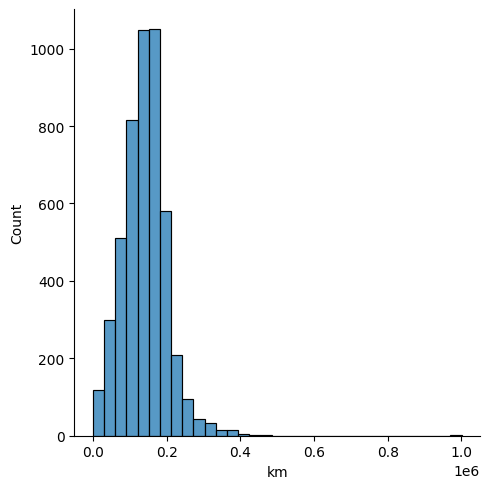

In [ ]:
sns.displot(df_bmw1, x = 'km',binwidth=30000)

<Axes: xlabel='km'>

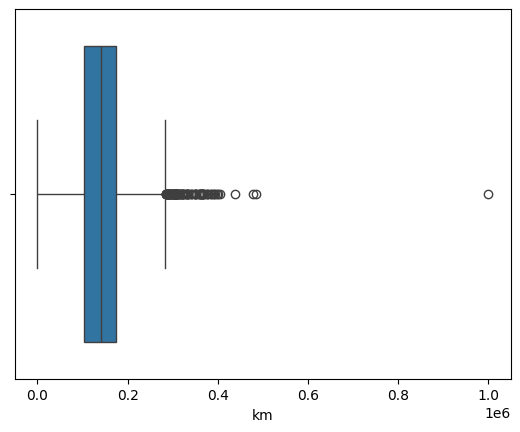

In [ ]:
sns.boxplot(x='km', data = df_bmw1)

* **MINIMUM VALUE: OUTLIER CORRECTION**

In [ ]:
df_bmw1[df_bmw1['km']<100]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
2938,640 Gran Coupé,-64.0,230.0,2014-06-05 13:42:51.428571392,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01,serie_6,1395


In [ ]:
df_bmw1.loc[2938,'km'] = df_bmw1[df_bmw1['modelo'] == '640 Gran Coupé']['km'].median()

* **MAXIMUM VALUE: OUTLIER CORRECTION**

In [ ]:
df_bmw1[df_bmw1['km']>1000000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
3732,118,1000376.0,90.0,2005-03-01,diesel,Undetermined,hatchback,True,False,False,False,False,True,False,1400.0,2018-06-01,serie_1,4840


In [ ]:
df_bmw1[df_bmw1['modelo'] == '118']['km'].median()

124334.0

In [ ]:
df_bmw1.loc[3732,'km']=df_bmw1[df_bmw1['modelo'] == '118']['km'].median()

* **VALUE DISTRIBUTION AFTER AMENDMENT**

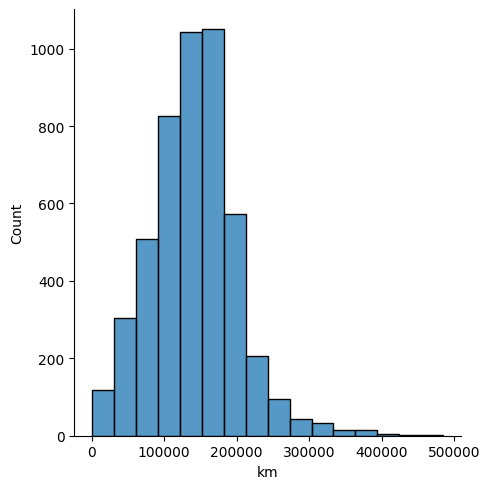

In [ ]:
sns.displot(df_bmw1, x = 'km',binwidth=30000)

<Axes: xlabel='km'>

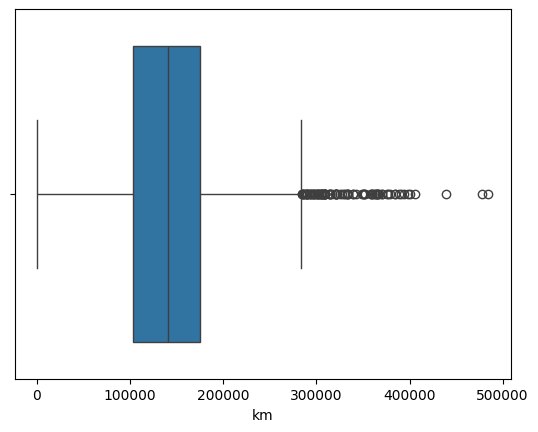

In [ ]:
sns.boxplot(x='km', data = df_bmw1)

##### **1.4.4 COLUMN ['potencia']**

The graph shows a general **normal distribution**, with some irregularities in some numbers, fact that could be explained due the different values of the **vehicle series**, that may affect some values.

As commented before, the maximum values would not be considered as an outlier, as can be achived in high-end vehicles. In this sense the action will be focused in the **low and negatives values**. This outliers will be corrected using the **median** of their respetive models.

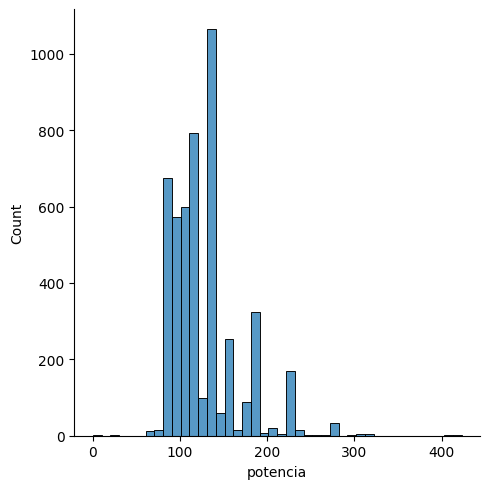

In [ ]:
sns.displot(df_bmw1, x = 'potencia',binwidth=10)

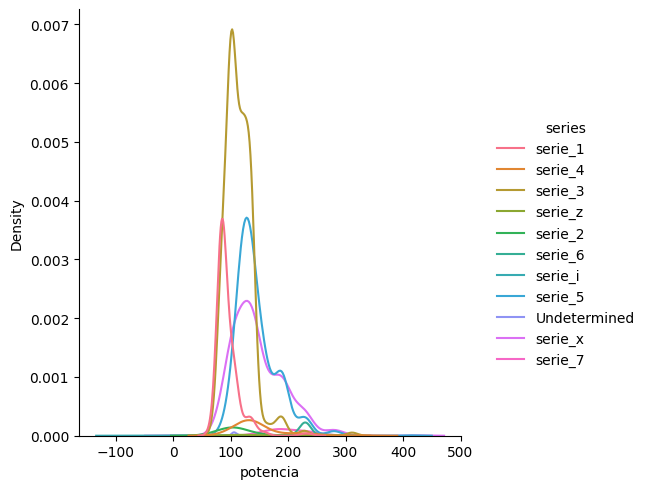

In [ ]:
sns.displot(df_bmw1, x = 'potencia', hue = 'series', kind = 'kde',bw_adjust=1.5);

<Axes: xlabel='potencia'>

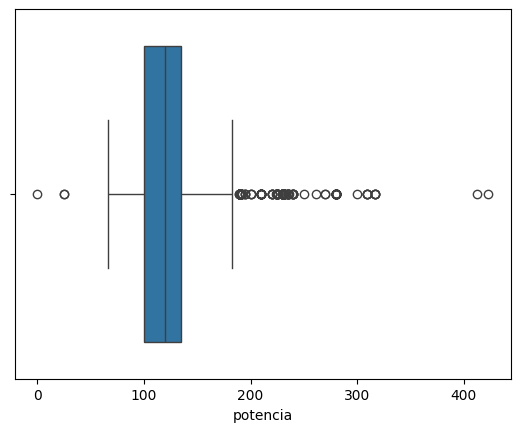

In [ ]:
sns.boxplot(df_bmw1, x = 'potencia')

* **CORRECCIÓN DEL VALOR MÍNIMO**

In [ ]:
df_bmw1[df_bmw1['potencia']<50]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
1796,i3,152328.0,25.0,2014-08-31 16:00:00,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,20300.0,2018-04-01,serie_i,1308
1925,i3,152470.0,25.0,2014-08-31 16:00:00,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,2018-03-01,serie_i,1277
3765,X1,81770.0,0.0,2014-10-01 00:00:00,diesel,white,suv,False,False,False,False,False,False,True,11700.0,2018-03-01,serie_x,1247


In [ ]:
df_bmw1[df_bmw1['modelo'] == 'i3']['potencia'].median()

75.0

In [ ]:
df_bmw1[df_bmw1['modelo'] == 'X1']['potencia'].median()

105.0

In [ ]:
df_bmw1.loc[1796,'potencia']=df_bmw1[df_bmw1['modelo'] == 'i3']['potencia'].median()
df_bmw1.loc[1925,'potencia']=df_bmw1[df_bmw1['modelo'] == 'i3']['potencia'].median()
df_bmw1.loc[3765,'potencia']=df_bmw1[df_bmw1['modelo'] == 'X1']['potencia'].median()

* **MAXIMUM VALUES CHECK**

The maximum outliers are for **M5 y X6 M** vehicles models, which match with vehicles over 400 horsepower. No changes will be applied.

In [ ]:
df_bmw1[df_bmw1['potencia']>400]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
3601,M5,150187.0,412.0,2012-09-01 06:19:11.464303360,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01,serie_5,2190
4146,X6 M,2970.0,423.0,2016-04-01 00:00:00.000000000,petrol,red,suv,True,True,True,False,False,True,True,82400.0,2018-04-01,serie_x,730


* **FINAL VALUE DISTRIBUTION**

<Axes: xlabel='potencia'>

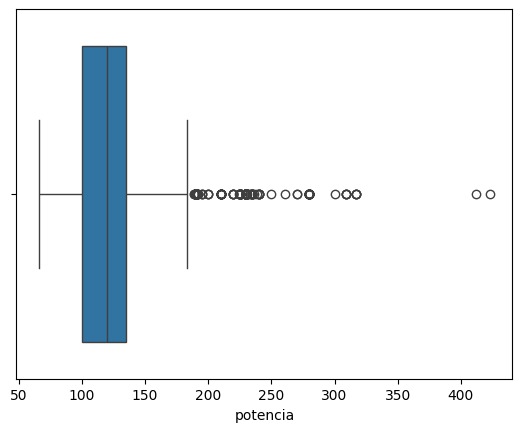

In [ ]:
sns.boxplot(df_bmw1, x = 'potencia')

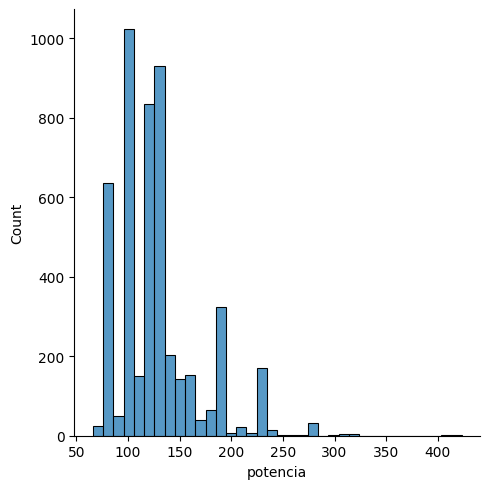

In [ ]:
sns.displot(df_bmw1, x = 'potencia',binwidth=10)

##### **1.4.5 COLUMN ['precio']**

The price chart shows a **normal distribution** slightly encored to the right and with few outliers elements in the left side, quite far away of the rest of the distribution.

Nevertheless, it has been check and this max outlier prices values are according with the high-end vehicles that represent. Therefore, the focus will be made in the low or negative prices. To amend the database, for vehicles under 2000 EUR, its value will be modified by the **median**.

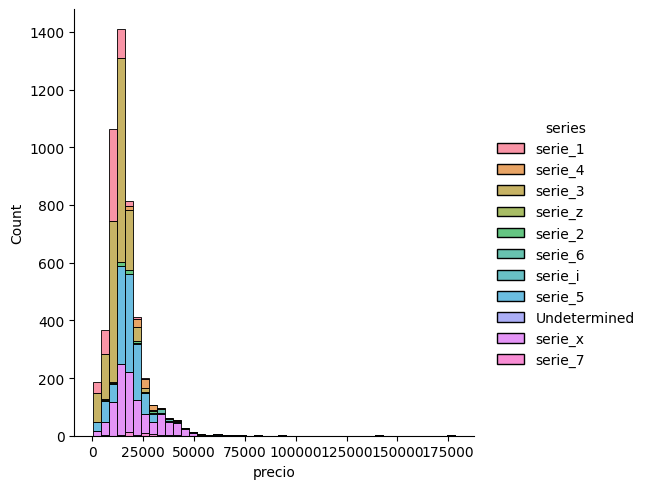

In [ ]:
sns.displot(df_bmw1, x = 'precio',binwidth=4000, hue='series', multiple='stack')

<Axes: xlabel='precio'>

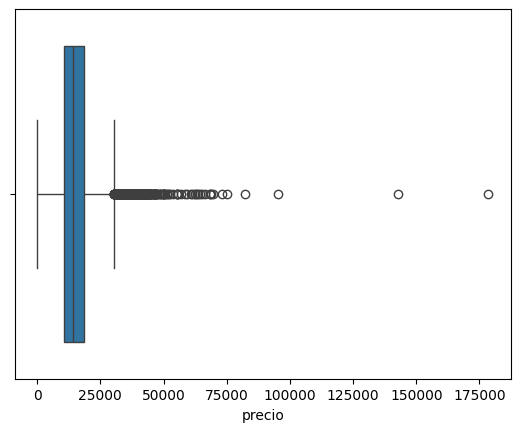

In [ ]:
sns.boxplot(df_bmw1, x = 'precio')

* **MINIMUM VALUE CORRECTION**

Firstly, to be able to do an EDA for the minimum outlier values without the noise of the maximum ones, it will be generated a **new temporary dataframe** that only include **prices below the median**.

After checking the temporary dataset and check the internet sources, I have interpret that values below 2000 EUR are quite improbable for a BMW vehicle, even with bad conditions. For those vehicles, we could eliminated them from the set (as is the variable to predict) or **apply the median**. As the dataset is quite small, in this case I prefered the second option.

In [ ]:
median_value = df_bmw1['precio'].median()
df_bmw1_lowprice = df_bmw1[df_bmw1['precio']<median_value]

14200.0

<Axes: xlabel='precio'>

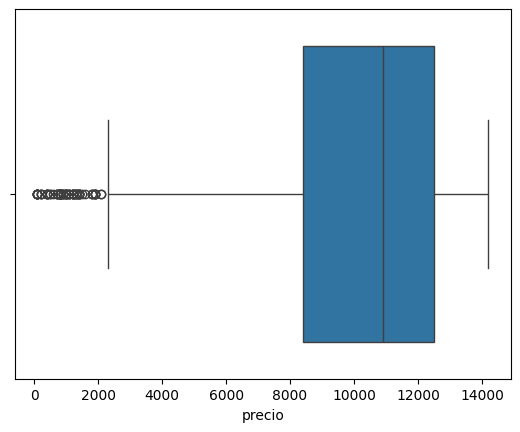

In [ ]:
sns.boxplot(df_bmw1_lowprice, x = 'precio')

In [ ]:
df_bmw1[df_bmw1['precio']<2000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series,tiempo_venta
25,318,196092.0,85.0,1995-10-01 00:00:00.000000000,petrol,Undetermined,convertible,True,False,False,False,False,False,False,1800.0,2018-05-01,serie_3,8248
58,316,265751.0,85.0,2012-12-03 19:29:13.846153728,petrol,silver,coupe,False,False,False,False,False,False,False,1000.0,2018-01-01,serie_3,1854
165,320,209208.0,135.0,2012-08-30 06:45:44.751381248,diesel,black,estate,False,True,False,False,False,False,True,800.0,2018-04-01,serie_3,2039
170,320,146639.0,135.0,2012-08-30 06:45:44.751381248,diesel,silver,estate,False,True,False,False,False,True,True,800.0,2018-04-01,serie_3,2039
171,316,159983.0,85.0,2012-12-03 19:29:13.846153728,diesel,grey,estate,False,False,False,False,False,False,True,800.0,2018-04-01,serie_3,1944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,X1,140752.0,105.0,2013-04-21 05:03:09.473684224,diesel,black,suv,False,False,False,False,False,False,True,800.0,2018-06-01,serie_x,1866
4356,X3,79685.0,190.0,2014-02-01 00:00:00.000000000,diesel,black,suv,False,False,False,False,False,False,True,100.0,2018-05-01,serie_x,1550
4802,Undetermined,118640.0,110.0,2014-01-01 00:00:00.000000000,diesel,white,suv,False,False,False,False,False,False,False,800.0,2018-03-01,Undetermined,1520
4806,218,118323.0,110.0,2014-09-01 00:00:00.000000000,diesel,white,convertible,False,False,False,False,False,False,False,800.0,2018-02-01,serie_2,1249


In [ ]:
for i in df_bmw1.index:
    if df_bmw1.loc[i,'precio'] < 2000:
        df_bmw1.loc[i,'precio'] = df_bmw1[df_bmw1['modelo'] == df_bmw1.loc[i, 'modelo']]['precio'].median()
    else:
        continue

* **FINAL VALUE DISTRIBUTION**

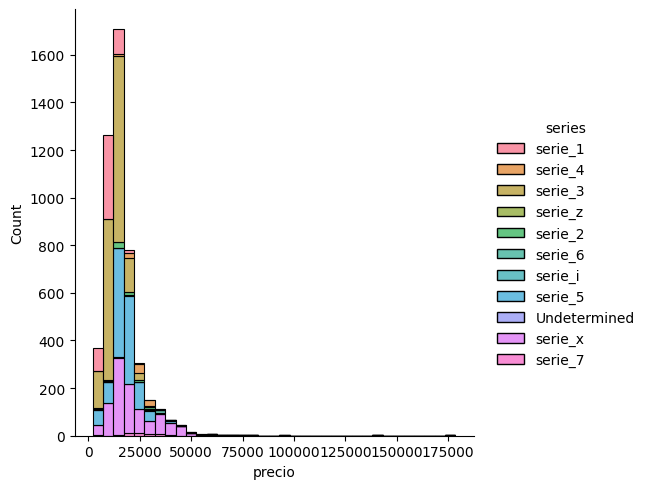

In [ ]:
sns.displot(df_bmw1, x = 'precio',binwidth=5000, hue='series', multiple='stack')

##### **1.4.6 COLUMN ['tiempo_venta']**

The ['tiempo_venta'] column is created from the difference between the vehicle register and its sale date. It shows a **normal distribution**. Nevertheless, as it can be seen in the graph, there are outliers at the end of both parts of the distribution, even some impossible negative values. In the case of the maximum ones, for this exercise and the information available has decided that this could be vintage vehicles, so these values will not be modified.

On the other side, it has been decided to apply the **model median values** for the outliers located in the minimum values.

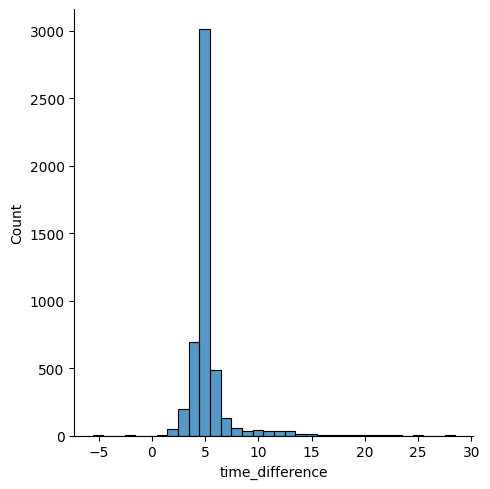

In [ ]:
sns.displot(df_bmw1, x = 'time_difference',binwidth=1)

<Axes: xlabel='time_difference'>

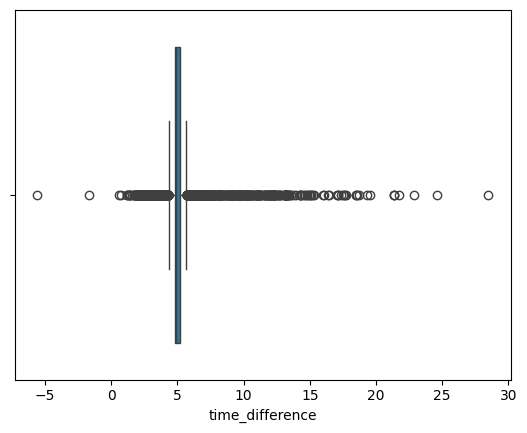

In [ ]:
sns.boxplot(df_bmw1, x = 'time_difference')

* **MINIMUM VALUE CORRECTION**

In [ ]:
df_bmw1[df_bmw1['time_difference']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,time_difference,year_sale,year_register
100,320,342768.0,135.0,diesel,black,estate,False,True,False,NaN,True,False,True,NaN,8200.0,serie_3,-1.69,2010,2012
256,316,201102.0,85.0,diesel,black,estate,True,NaN,False,NaN,False,False,True,False,8800.0,serie_3,-5.58,2008,2014


In [ ]:
df_bmw1.loc[42,'tiempo_venta']=df_bmw1.loc[df_bmw1['modelo'] == '330', 'tiempo_venta'].median()
df_bmw1.loc[100,'tiempo_venta']=df_bmw1.loc[df_bmw1['modelo'] == '320', 'tiempo_venta'].median()
df_bmw1.loc[180,'tiempo_venta']=df_bmw1.loc[df_bmw1['modelo'] == '320', 'tiempo_venta'].median()
df_bmw1.loc[256,'tiempo_venta']=df_bmw1.loc[df_bmw1['modelo'] == '316', 'tiempo_venta'].median()

* **CHECK MAXIMUM OUTLIERS VALUES**

<Axes: xlabel='tiempo_venta'>

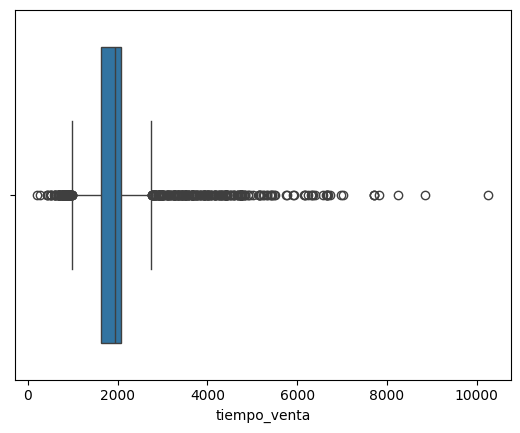

In [ ]:
sns.boxplot(df_bmw1, x = 'tiempo_venta')

* **FINAL DISTRIBUTION**

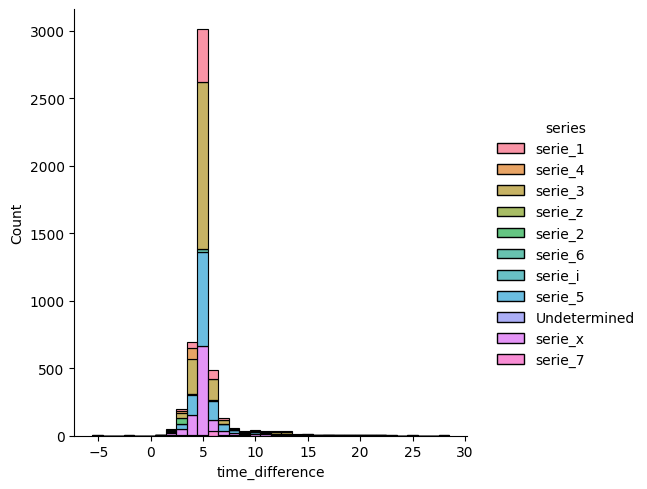

In [ ]:
sns.displot(df_bmw1, x = 'time_difference',hue='series',multiple='stack',binwidth=1)

#### **1.5 ELIMINATE COLUMNS**

Finally, those columns used as base for the feature engineering will be deleted.

In [ ]:
del_col = ['modelo', 'fecha_venta', 'fecha_registro']
df_bmw1.drop(del_col, axis=1, inplace=True)

In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4837 non-null   float64
 1   potencia              4837 non-null   float64
 2   tipo_gasolina         4837 non-null   object 
 3   color                 4837 non-null   object 
 4   tipo_coche            4837 non-null   object 
 5   volante_regulable     4837 non-null   bool   
 6   aire_acondicionado    4837 non-null   bool   
 7   camara_trasera        4837 non-null   bool   
 8   elevalunas_electrico  4837 non-null   bool   
 9   bluetooth             4837 non-null   bool   
 10  gps                   4837 non-null   bool   
 11  alerta_lim_velocidad  4837 non-null   bool   
 12  precio                4837 non-null   float64
 13  series                4837 non-null   object 
 14  tiempo_venta          4837 non-null   int64  
dtypes: bool(7), float64(3

#### **1.6 EDA: FEATURE VS TARGET ANALYSIS**

##### **1.6.1 CATHEGORIC FEATURES**

* **GASOLINE TYPE**: Seems to be a positive correlation between the electric / hybrid motors and the car price value.

<ipython-input-481-2ae6d9edb19b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_gasolina',y='precio',  data=df_bmw1, palette='coolwarm')


<Axes: xlabel='tipo_gasolina', ylabel='precio'>

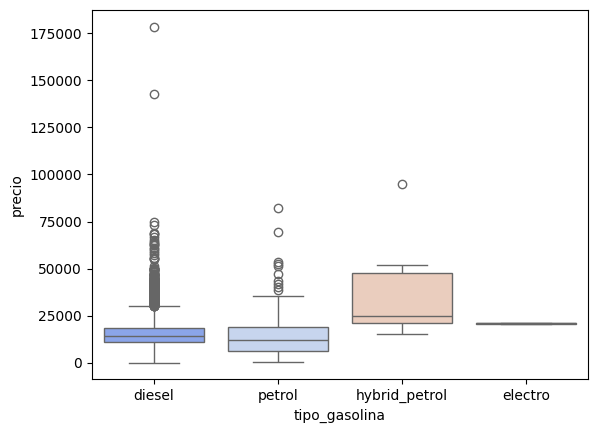

In [ ]:
sns.boxplot(x='tipo_gasolina',y='precio',  data=df_bmw1, palette='coolwarm')

* **COLOR**: There is no appreciable correlation between the color and the vehicle price, except maybe for the green ones. But as there are few green vehicles, may cannot be representative.

<ipython-input-482-561c31bbf419>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color',y='precio',  data=df_bmw1, palette='coolwarm')


<Axes: xlabel='color', ylabel='precio'>

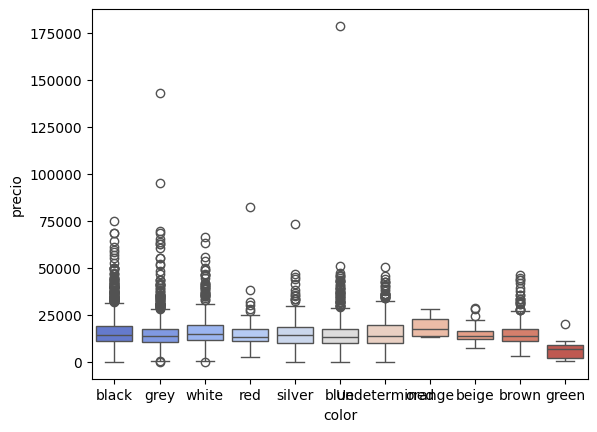

In [ ]:
sns.boxplot(x='color',y='precio',  data=df_bmw1, palette='coolwarm')

* **CAR TYPE**: It seems that there is a correlation between the car type and its price, even tough the dataset is again maybe to small to be able to generalize this topic.

<ipython-input-483-c340eac7647f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_coche',y='precio',  data=df_bmw1, palette='coolwarm')


<Axes: xlabel='tipo_coche', ylabel='precio'>

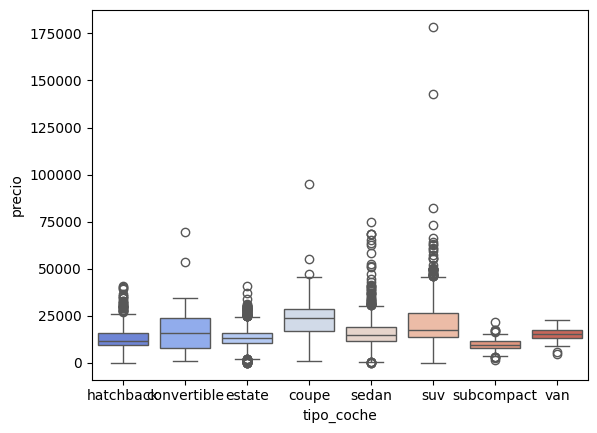

In [ ]:
sns.boxplot(x='tipo_coche',y='precio',  data=df_bmw1, palette='coolwarm')

* **SERIES**: It seems that there is a clear correlation between the prices and the vehicle series. It also can be observed that some series has a more noticiable inner variations than other ones, in which the prices si quite stable.

<ipython-input-484-7c1e107c0367>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='series',y='precio',  data=df_bmw1, palette='coolwarm')


<Axes: xlabel='series', ylabel='precio'>

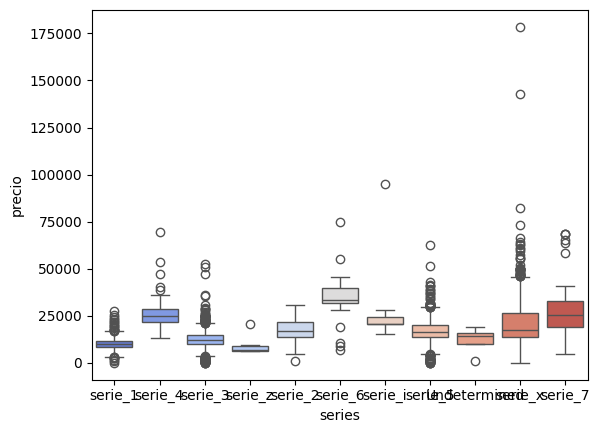

In [ ]:
sns.boxplot(x='series',y='precio',  data=df_bmw1, palette='coolwarm')

##### **1.6.2 NUMERIC FEATURES**

* **KM**: Clear negative correlation relationship between the number of kilometers and the vehicle price.

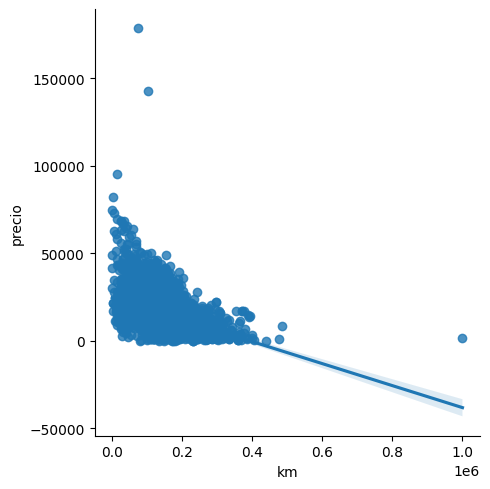

In [ ]:
sns.lmplot(x="km", y="precio", data=df_bmw1)

* **POWER**: Clear positive correlation between the vehicle horsepower and its price.

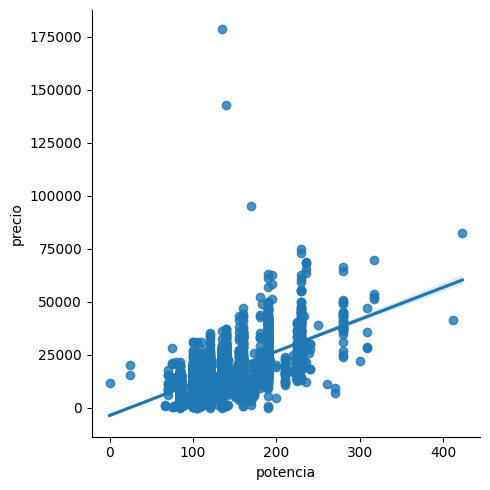

In [ ]:
sns.lmplot(x="potencia", y="precio", data=df_bmw1)

* **SALE TIME**: Noticiable negative correlation between the sales time and the vehicle price. This is excepcionally notorious between 0 and 5.

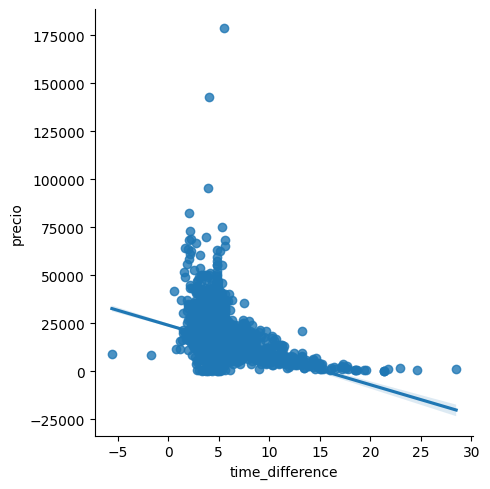

In [ ]:
sns.lmplot(x="time_difference", y="precio", data=df_bmw1)

##### **1.6.3 BOOLEAN FEATURES**

There is an **overall positive correlation** between having a feature and a bigger vehicle price. Nevertheless, there is the curious case of the GPS features, were the vehicles who have it haD and slightly lower average price.

* **ADJUSTABLE STEERING WHEEL**:

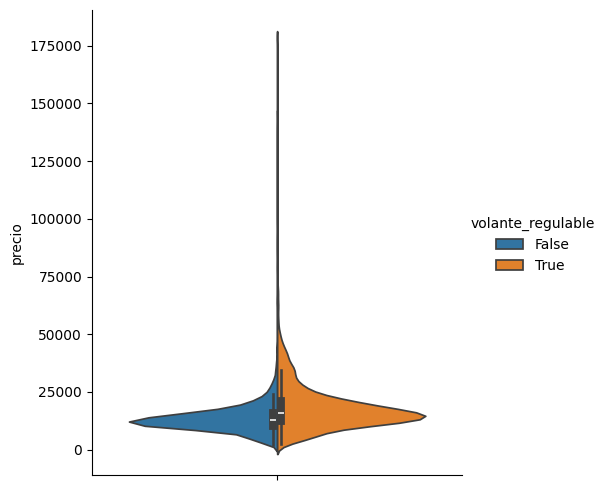

In [ ]:
sns.catplot(df_bmw1, hue='volante_regulable', y = 'precio', kind='violin', split=True);

* **AIR CONDITIONER**:

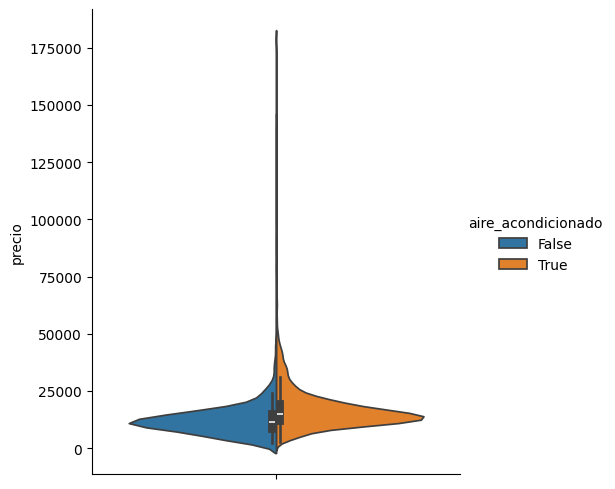

In [ ]:
sns.catplot(df_bmw1, hue='aire_acondicionado', y = 'precio', kind='violin', split=True);

* **REAR CAMERA**:

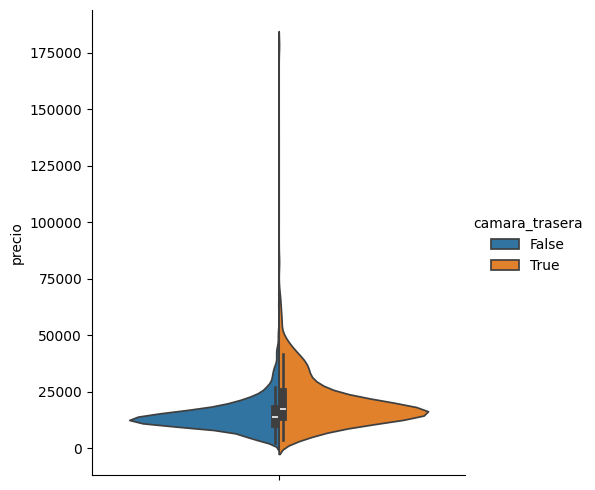

In [ ]:
sns.catplot(df_bmw1, hue='camara_trasera', y = 'precio', kind='violin', split=True);

* **ELECTRIC WINDOWS**:

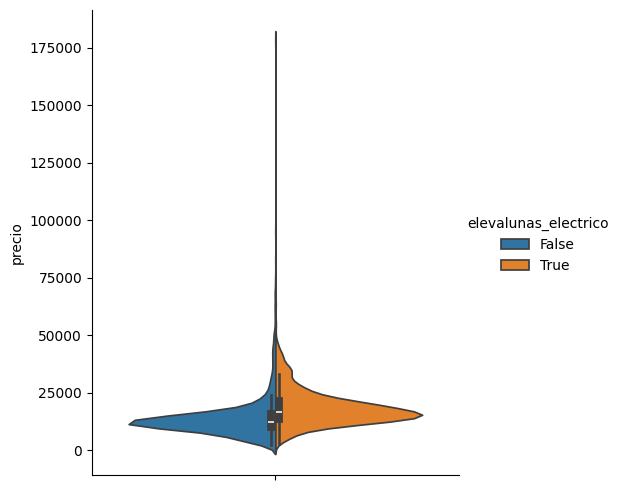

In [ ]:
sns.catplot(df_bmw1, hue='elevalunas_electrico', y = 'precio', kind='violin', split=True);

* **BLUETHOOTH**:

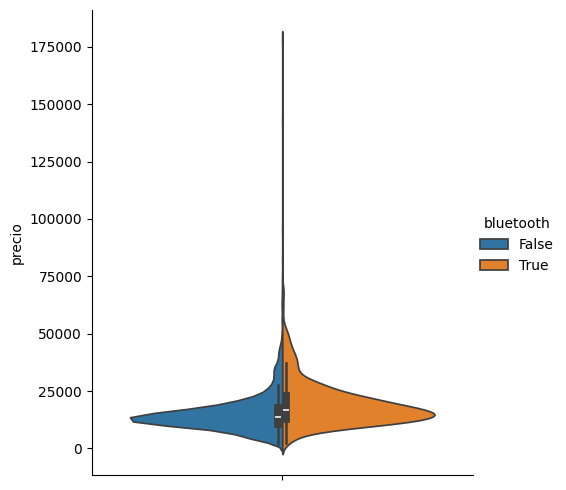

In [ ]:
sns.catplot(df_bmw1, hue='bluetooth', y = 'precio', kind='violin', split=True);

* **GPS**:

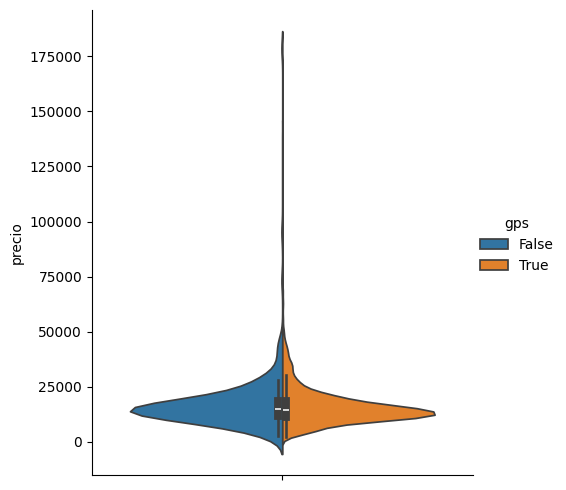

In [ ]:
sns.catplot(df_bmw1, hue='gps', y = 'precio', kind='violin', split=True);

* **SPEED LIMIT ALERT**:

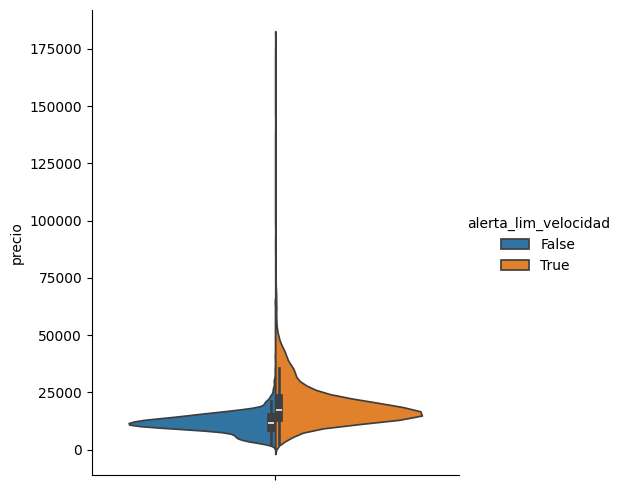

In [ ]:
sns.catplot(df_bmw1, hue='alerta_lim_velocidad', y = 'precio', kind='violin', split=True);

#### **1.7 INITIAL CORRELATION ANALISIS [NUMERIC FEATURES]**

In [ ]:
corr = df_bmw1.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
km,1.000000,-0.048361,0.064334,0.020908,0.004003,0.049618,-0.034506,0.157631,-0.030396,-0.387097,0.359816
potencia,-0.048361,1.000000,0.327453,0.180919,0.313508,0.342145,0.204965,0.007090,0.488703,0.643909,-0.063564
volante_regulable,0.064334,0.327453,1.000000,0.286858,0.254661,0.278169,0.126730,0.243908,0.243732,0.260428,0.055619
aire_acondicionado,0.020908,0.180919,0.286858,1.000000,0.142852,0.258296,0.104012,0.343990,0.210401,0.195487,-0.145432
camara_trasera,0.004003,0.313508,0.254661,0.142852,1.000000,0.198955,0.125326,0.061938,0.203464,0.253332,0.014938
elevalunas_electrico,0.049618,0.342145,0.278169,0.258296,0.198955,1.000000,0.235216,0.203521,0.332775,0.247794,-0.066060
bluetooth,-0.034506,0.204965,0.126730,0.104012,0.125326,0.235216,1.000000,0.116086,0.077963,0.182576,-0.059244
gps,0.157631,0.007090,0.243908,0.343990,0.061938,0.203521,0.116086,1.000000,-0.064709,-0.024913,0.063450
alerta_lim_velocidad,-0.030396,0.488703,0.243732,0.210401,0.203464,0.332775,0.077963,-0.064709,1.000000,0.440848,-0.100413
precio,-0.387097,0.643909,0.260428,0.195487,0.253332,0.247794,0.182576,-0.024913,0.440848,1.000000,-0.292245


### **2. PREPROCESSING: CATHEGORICS TRANSFORMATION TO BINARY VALUES**

#### **2.1 COPY GENERATION '2'**

In [ ]:
df_bmw2=df_bmw1.copy()

#### **2.2 FEATURE SPLIT ACCORDING TO ITS DATATYPE**

In [ ]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4837 non-null   float64
 1   potencia              4837 non-null   float64
 2   tipo_gasolina         4837 non-null   object 
 3   color                 4837 non-null   object 
 4   tipo_coche            4837 non-null   object 
 5   volante_regulable     4837 non-null   bool   
 6   aire_acondicionado    4837 non-null   bool   
 7   camara_trasera        4837 non-null   bool   
 8   elevalunas_electrico  4837 non-null   bool   
 9   bluetooth             4837 non-null   bool   
 10  gps                   4837 non-null   bool   
 11  alerta_lim_velocidad  4837 non-null   bool   
 12  precio                4837 non-null   float64
 13  series                4837 non-null   object 
 14  tiempo_venta          4837 non-null   int64  
dtypes: bool(7), float64(3

In [ ]:
target = ['precio']
def obtain_variables(dataset):
  list_num = []
  list_bool = []
  list_cat = []

  for i in dataset:
    if (dataset[i].dtype.kind=='i' or dataset[i].dtype.kind=='f') and len(dataset[i].unique()) != 2 and i not in target:
      list_num.append(i)
    elif (dataset[i].dtype.kind=='i' or dataset[i].dtype.kind=='b'or dataset[i].dtype.kind=='f') and len(dataset[i].unique()) == 2 and i not in target:
      list_bool.append(i)
    elif (dataset[i].dtype.kind=='O' ) and i not in target:
      list_cat.append(i)

  return list_num, list_bool, list_cat

In [ ]:
lnum,lbool,lcat=obtain_variables(df_bmw2)

In [ ]:
print(lnum)
print(lbool)
print(lcat)

['km', 'potencia', 'tiempo_venta']
['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']
['tipo_gasolina', 'color', 'tipo_coche', 'series']


#### **2.3 CATHEGORICAL FEATURES TO BINARY - .get_dummies()**

Once split the cathegorical features in a list, it will be proceed to transform those values to boolean ones. In this sense, first the **column ['color']** will be deleted from the dataset, as it is not a variable that can really influence in the price.

In [ ]:
lcat.remove('color')
print(lcat)

['tipo_gasolina', 'tipo_coche', 'series']


In [ ]:
df_bmw2=pd.get_dummies(data=df_bmw2, columns=lcat)

In [ ]:
del(df_bmw2['color'])

In [ ]:
df_bmw2.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
0,140411.0,100.0,True,True,False,True,False,True,False,11300.0,...,1,0,0,0,0,0,0,0,0,0
1,13929.0,317.0,True,True,False,False,True,True,True,69700.0,...,0,0,0,1,0,0,0,0,0,0
2,183297.0,120.0,False,False,False,True,False,True,False,10200.0,...,0,0,1,0,0,0,0,0,0,0
3,128035.0,135.0,True,True,False,True,True,True,True,25100.0,...,0,0,0,1,0,0,0,0,0,0
4,97097.0,160.0,True,True,False,False,True,True,True,33400.0,...,0,0,0,1,0,0,0,0,0,0


#### **2.4 BOOLEAN FEATURES TO BINARY - .astype(int)**

Finally, the boolean variables will be **transformed to numeric changing their datatype to integer** using the method .astype(int). This will change its values to 1 if it is *True* and 0 if it is *False*.

In [ ]:
df_bmw2[lbool]=df_bmw2[lbool].astype(int)

In [ ]:
df_bmw2.head(1)

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
0,140411.0,100.0,1,1,0,1,0,1,0,11300.0,...,1,0,0,0,0,0,0,0,0,0


#### **2.5 NUMERIC FEATURES NORMALIZATION - minmaxscaler()**

Finally, the numeric features will be normalized usting the **.minmaxscaler()** method from **SKLearn library**. This will allow to adjust all the variables values from 0 to 1, avoiding that features with different value magnitudes have different weight during the ML process.

In [ ]:
lnum

['km', 'potencia', 'tiempo_venta']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxResult=MinMaxScaler()

In [ ]:
df_bmw2[lnum]=minMaxResult.fit_transform(df_bmw2[lnum])

In [ ]:
df_bmw2.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
0,0.289039,0.095238,1,1,0,1,0,1,0,11300.0,...,1,0,0,0,0,0,0,0,0,0
1,0.027787,0.703081,1,1,0,0,1,1,1,69700.0,...,0,0,0,1,0,0,0,0,0,0
2,0.377621,0.151261,0,0,0,1,0,1,0,10200.0,...,0,0,1,0,0,0,0,0,0,0
3,0.263476,0.193277,1,1,0,1,1,1,1,25100.0,...,0,0,0,1,0,0,0,0,0,0
4,0.199573,0.263305,1,1,0,0,1,1,1,33400.0,...,0,0,0,1,0,0,0,0,0,0


#### **2.6 FINAL FEATURE ANALYSIS**

After performing the data cleaning process and preprocessing all the features to binary values, the it is obtanied the dataset that can be used for training future ML predictive models.

In the same sense, this final DataFrame also allows to observe **features that should be removed**, due its **constant values**, **lack or excesive correlation** and for being to similar to others. It is important to only include independent variables that are somehow related to the dependent variable and, at the same time, are **independent between them**. If not, the efficience of the model will be reduced.

##### **2.6.1 PREPROCESSED DATASET**

In [ ]:
corr = df_bmw2.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,series_Undetermined,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
km,1.000000,-0.048361,0.064334,0.020908,0.004003,0.049618,-0.034506,0.157631,-0.030396,-0.387097,0.359816,0.048095,-0.038182,-0.035525,-0.037108,-0.058883,-0.077237,0.190837,-0.118742,0.066611,-0.030563,-0.114814,-0.095281,-0.005904,-0.122974,-0.136001,0.112184,-0.145183,0.173186,-0.037137,0.002101,-0.047120,-0.115710,-0.021669
potencia,-0.048361,1.000000,0.327453,0.180919,0.313508,0.342145,0.204965,0.007090,0.488703,0.643909,-0.063564,-0.121917,-0.023924,0.038911,0.120170,0.030965,0.139323,-0.056523,-0.232798,0.032322,-0.134165,0.236390,-0.051299,-0.014322,-0.320987,-0.040069,-0.280019,0.068503,0.231808,0.209660,0.192453,-0.032600,0.238126,0.000112
volante_regulable,0.064334,0.327453,1.000000,0.286858,0.254661,0.278169,0.126730,0.243908,0.243732,0.260428,0.055619,0.006235,0.005866,0.016401,-0.010577,0.035168,0.037636,0.012854,-0.167762,0.049285,-0.090674,0.100798,-0.043820,-0.027514,-0.240716,-0.060368,-0.203020,0.048272,0.273099,0.072718,0.092250,0.001677,0.102388,0.031909
aire_acondicionado,0.020908,0.180919,0.286858,1.000000,0.142852,0.258296,0.104012,0.343990,0.210401,0.195487,-0.145432,0.082087,0.011838,0.006216,-0.087128,-0.040647,-0.038546,0.089063,-0.114700,0.060177,-0.105741,-0.009501,0.007061,-0.009584,-0.204569,0.003908,-0.035367,0.011609,0.186808,0.018114,0.050490,0.018090,-0.009741,-0.059013
camara_trasera,0.004003,0.313508,0.254661,0.142852,1.000000,0.198955,0.125326,0.061938,0.203464,0.253332,0.014938,-0.011144,-0.012509,-0.007751,0.014664,-0.039506,0.020108,-0.041598,-0.051308,0.002198,-0.043270,0.109784,-0.016448,-0.012509,-0.103718,-0.013234,-0.155529,-0.003348,0.106540,0.088881,0.128193,-0.005554,0.110072,-0.017696
elevalunas_electrico,0.049618,0.342145,0.278169,0.258296,0.198955,1.000000,0.235216,0.203521,0.332775,0.247794,-0.066060,-0.001981,-0.023021,-0.006991,0.006437,-0.004471,0.098586,0.051039,-0.097931,0.007410,-0.097651,0.031889,-0.074039,-0.006361,-0.188406,-0.065392,-0.156159,0.103218,0.251582,0.050526,0.055767,-0.035180,0.031359,-0.020783
bluetooth,-0.034506,0.204965,0.126730,0.104012,0.125326,0.235216,1.000000,0.116086,0.077963,0.182576,-0.059244,-0.030643,-0.012758,-0.008304,0.034840,0.044996,0.137570,-0.031281,0.022764,-0.021024,-0.044778,-0.000807,-0.023380,-0.012758,-0.016170,-0.004954,-0.021509,0.141901,-0.008799,0.035498,-0.030165,-0.019496,-0.001783,0.039861
gps,0.157631,0.007090,0.243908,0.343990,0.061938,0.203521,0.116086,1.000000,-0.064709,-0.024913,0.063450,0.046221,0.006730,-0.009212,-0.046416,-0.003189,-0.008214,0.045190,0.020447,0.043229,0.027799,-0.110619,-0.030734,-0.026252,0.023952,-0.026780,0.002662,-0.016565,0.089361,0.021697,0.028705,-0.011316,-0.110792,0.009521
alerta_lim_velocidad,-0.030396,0.488703,0.243732,0.210401,0.203464,0.332775,0.077963,-0.064709,1.000000,0.440848,-0.100413,0.016304,0.006625,0.038022,-0.025527,-0.022366,0.027202,-0.017822,-0.199809,0.022928,-0.129531,0.212135,-0.017732,-0.026668,-0.320479,-0.029072,-0.273689,0.069898,0.293659,0.059444,0.099257,0.024660,0.214744,-0.037726
precio,-0.387097,0.643909,0.260428,0.195487,0.253332,0.247794,0.182576,-0.024913,0.440848,1.000000,-0.292245,-0.004556,0.013541,0.097362,-0.017366,0.018862,0.120898,-0.207063,-0.132125,0.017654,-0.088062,0.324499,-0.009531,-0.006238,-0.243564,0.020721,-0.297961,0.160664,0.076175,0.162754,0.147742,0.066171,0.324691,-0.025822


##### **2.6.2 REMOVING UNUSEFUL PREPROCESSED FEATURES**

In [ ]:
df_bmw3 = df_bmw2.copy()

Para poder visualizar de forma sencilla en que variables independientes existe demasiada correlación con otra o nula correlación con la variable dependiente, se utilizarán las siguientes formulas, para posteriormente dropearlas del conjunto:

* **HIGH CORRELATION**: There is a huge correlation between the columns '**tipo_coche_suv**' and '**series_serie_x**'. As the second feature has a higher correlation to the price than the first one (0.324499 vs 0.324691), it will be proceded to delete the first ['tipo_coche_suv'].

In [ ]:
del(df_bmw3['tipo_coche_suv'])

* **LACK OF CORRELATION**: On the other part, all of the features that have a **below 3% correlation** with the dependent variable ['precio'], will also be deleted from the dataset, in order to avoid excessive noise from the future model and being more easy to generalize and not commit overfit.
  * ['**gps**'] (-2.5%)
  * ['**tipo_gasolina_diesel**'] (-0.4%)
  * ['**tipo_gasolina_electro**'] (+1.3%)
  * ['**tipo_gasolina_petrol**'] (-1.7%)
  * ['**tipo_coche_convertible**'] (+1.9%)
  * ['**tipo_coche_sedan**'] (+1.8%)
  * ['**tipo_coche_van**'] (-0.9%)
  * ['**series_Undetermined**'] (-0.6%)
  * ['**series_serie_2**'] (+2.0%)
  * ['**series_serie_z**'] (-2.6%)


In [ ]:
low_corr=['gps','tipo_gasolina_diesel','tipo_gasolina_electro','tipo_gasolina_petrol','tipo_coche_convertible','tipo_coche_sedan','tipo_coche_van','series_Undetermined','series_serie_2','series_serie_z',]

In [ ]:
columns_to_drop = [col for col in low_corr if col in df_bmw3.columns]
df_bmw3.drop(columns=columns_to_drop, inplace=True)

##### **2.6.3 FINAL DATA FRAME**

In [ ]:
corr = df_bmw3.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,tiempo_venta,tipo_gasolina_hybrid_petrol,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_subcompact,series_serie_1,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x
km,1.000000,-0.048361,0.064334,0.020908,0.004003,0.049618,-0.034506,-0.030396,-0.387097,0.359816,-0.035525,-0.077237,0.190837,-0.118742,-0.030563,-0.122974,0.112184,-0.145183,0.173186,-0.037137,0.002101,-0.047120,-0.115710
potencia,-0.048361,1.000000,0.327453,0.180919,0.313508,0.342145,0.204965,0.488703,0.643909,-0.063564,0.038911,0.139323,-0.056523,-0.232798,-0.134165,-0.320987,-0.280019,0.068503,0.231808,0.209660,0.192453,-0.032600,0.238126
volante_regulable,0.064334,0.327453,1.000000,0.286858,0.254661,0.278169,0.126730,0.243732,0.260428,0.055619,0.016401,0.037636,0.012854,-0.167762,-0.090674,-0.240716,-0.203020,0.048272,0.273099,0.072718,0.092250,0.001677,0.102388
aire_acondicionado,0.020908,0.180919,0.286858,1.000000,0.142852,0.258296,0.104012,0.210401,0.195487,-0.145432,0.006216,-0.038546,0.089063,-0.114700,-0.105741,-0.204569,-0.035367,0.011609,0.186808,0.018114,0.050490,0.018090,-0.009741
camara_trasera,0.004003,0.313508,0.254661,0.142852,1.000000,0.198955,0.125326,0.203464,0.253332,0.014938,-0.007751,0.020108,-0.041598,-0.051308,-0.043270,-0.103718,-0.155529,-0.003348,0.106540,0.088881,0.128193,-0.005554,0.110072
elevalunas_electrico,0.049618,0.342145,0.278169,0.258296,0.198955,1.000000,0.235216,0.332775,0.247794,-0.066060,-0.006991,0.098586,0.051039,-0.097931,-0.097651,-0.188406,-0.156159,0.103218,0.251582,0.050526,0.055767,-0.035180,0.031359
bluetooth,-0.034506,0.204965,0.126730,0.104012,0.125326,0.235216,1.000000,0.077963,0.182576,-0.059244,-0.008304,0.137570,-0.031281,0.022764,-0.044778,-0.016170,-0.021509,0.141901,-0.008799,0.035498,-0.030165,-0.019496,-0.001783
alerta_lim_velocidad,-0.030396,0.488703,0.243732,0.210401,0.203464,0.332775,0.077963,1.000000,0.440848,-0.100413,0.038022,0.027202,-0.017822,-0.199809,-0.129531,-0.320479,-0.273689,0.069898,0.293659,0.059444,0.099257,0.024660,0.214744
precio,-0.387097,0.643909,0.260428,0.195487,0.253332,0.247794,0.182576,0.440848,1.000000,-0.292245,0.097362,0.120898,-0.207063,-0.132125,-0.088062,-0.243564,-0.297961,0.160664,0.076175,0.162754,0.147742,0.066171,0.324691
tiempo_venta,0.359816,-0.063564,0.055619,-0.145432,0.014938,-0.066060,-0.059244,-0.100413,-0.292245,1.000000,-0.018956,-0.042831,0.053092,-0.080872,-0.005426,0.017646,0.015912,-0.151731,0.073587,-0.029817,0.013101,-0.035504,-0.024301


#### **PREGUNTAS**

##1. ¿Qué columnas eliminaron inicialmente del dataset y por qué?

**Columnas eliminadas de forma directa:**

 columnas que he eliminado directamente son:
*  [**'marca'**]: Al ser un dataset de BMW, se presupone que todos los valores serán de BMW, con lo cual la variable es constante no aportará nada al modelo.

*  [**'alerta_lim_velocidad'**]: La mayoría de estos valores son nulos (alrededor del 70% del total). Al ser una variable booleana, la imputación de la moda general daría demasiado peso a la misma por encima de los valores reales y la imputación mediante series daría un elemento demasiado generalista.

----

**Columnas eliminadas tras la imputación de nulos:**

Estas variables se han eliminado al final, antes de empezar la exploración de los datos, pues sus registros han sido útiles para imputar nulos, cuando estos eran pocos, de forma eficiente o bien porque han servido para generar otras columnas con información que puede ser útil para la computación del precio.

* [**'modelo'**]: La variable contenía una gran cantidad de valores categóricos, la mayoría de ellos con pocos o muy pocos registros. En consecuencia, se ha generado una nueva columna que aglutine los vehículos por series [**'series'**] y su rango aproximado de precio, al ser esta la variable dependiente.

* ['**fecha_registro**'] y ['**fecha_venta**']: Estas variables han servido para generar ['**tiempo_venta**'], la cual es la diferencia en días entre la fecha de venta del vehículo y su diferencia de registro.




##2. Manejo de nulos, explicar qué se hizo con los nulos por cada columna


Se ha optado por minimizar la eliminación de registros, siempre tratando de buscar algunos elementos que permitieran imputar valores a los nulos.

*  [**'marca'**]: Nulos -  970 [Columna eliminada]. Al tratarse de un database de BMW, se entiende que el conjunto de valores de marca serán 'BMW' y en consecuencia se ha realizado un '.fillna('BMW') para los valores nulos.
*  [**'modelo'**]: Nulos - 3. Creación nueva categoría 'Undetermined'. Dado que los resultados en sus otros valores pueden ser interesantes, se ha creado una nueva categoría mediante '.fillna('Undetermined'). Esta categoría se ha arrastrado luego a ['series'].
*  [**'km'**]: Nulos - 2. Imputación de mediana de vehículos de su mismo ['modelo'] y ['potencia']. Se ha realizado mediante el condicional '&', '.median()' y '.loc[]' para asignarlos.
*  [**'potencia'**]: Nulos - 1. Se la ha asignado la media de su modelo tras comprobar que existieran suficiente valores del mismo. Se ha realizado mediante 'median' de potencia con el filtro de ['modelo'] y un '.fillna()' con el valor.
*  [**'fecha_registro'**]: Nulos - 2423. Asignar valor promedio de su ['modelo'] y en su defecto, de la ['serie']. A pesar de la gran cantidad de nulos (aprox. 50%) se ha tratado de obtener valores aproximados para luego poder generar la columna ['tiempo_venta'].
*  [**'tipo_gasolina'**]: Nulos - 5. Asignar la moda general. La abrumadora mayoría del registro son vehículos 'diesel'. Se ha asignado esta moda mediante un '.fillna()'.
*  [**'color'**]: Nulos - 445. Creación nueva categoría 'Undetermined'. Dado que los resultados en sus otros valores pueden ser interesantes y no existe forma de imputar nulos, pues la moda no es clara y es variable categórica, se ha creado una nueva categoría mediante '.fillna('Undetermined').
*  [**'tipo_coche'**]: Nulos - 1460. Asignar moda por ['modelo'] y en su defecto ['series']. A pesar del alto volumen de nulos, la gran mayoría de modelos tenían una moda significativa hacia un tipo de vehículo, así que se les ha asignado esta. En los casos que por modelo no pudo asignarse valor (18), se utilizó la mayoritaria en sus columna de series.
*  [**'volante_regulable'**]: Nulos - 4. Asignar moda de la columna ['modelo'].Existen pocos valores nulos y los resultados están bastante parejos, con lo que se ha asignado el valor mayoritario en su modelo mediante '.fillna()'.
*  [**'aire_acondicionado'**]: Nulos - 486. Asignar la moda global. Existe un considerable número de nulos, pero en todas las series el 'True' se impone de forma clara, un 80% en el global. De este modo, se asignará mediante '.fillna()' el True en esta variable.
*  [**'camara_trasera'**]: Nulos - 2. Asignar moda de la columna ['modelo'].Existen pocos valores nulos y los resultados se decantan claramente por el 'False', con lo que se ha asignado el valor mayoritario en su modelo mediante '.fillna()'.
*  [**'asientos_traseros_plegables'**]: Nulos - 3391 [Columna eliminada]. Dado que el volumen de nulos era del 70%, se ha dropeado la columna, puesto que asignar moda en base a tan pocos valores podría desbalancear esta categoría.
*  [**'elevalunas_electrico'**]: Nulos - 2. Nulos - 2. Asignar moda de la columna ['modelo'].Existen pocos valores nulos y los resultados se decantan claramente por el 'True', con lo que se ha asignado el valor mayoritario en su modelo mediante '.fillna()'.
*  [**'bluetooth'**]: Nulos - 728. Asignar la moda de su ['series']. Al existir una notable cantidad de valores nulos, aplicar mediante modelo podría ser poco riguroso por la falta de registros, con lo que se ha preferido imputar los de su serie.
*  [**'alerta_lim_velocidad'**]: Nulos - 728. Asignar la moda de su ['series']. Al existir una notable cantidad de valores nulos, aplicar mediante modelo podría ser poco riguroso por la falta de registros, con lo que se ha preferido imputar los de su serie.
*  [**'precio'**]: Nulos - 6 [Registros eliminados]. Al formar parte de la variable dependiente, se han dropeado los registros que no tenian valor asignado.
*  [**'fecha_venta'**]: Nulo1 - 1. Aplicar el valor promedio de la columna ['modelo'] mediante '.loc[]'.



##3. Análisis univariable, explicar alguna información interesante encontrada


* **PREVIO**:
1. La mayoría de **variables booleanas estaban como string**, así que se ha efectuado un '.replace()' para pasarlas a tipo 'bool'.
2. En ['**tipo_gasolina**'] existía una categoría duplicada, se ha corregido el duplicado, también mediante '.replace()'.

----
* **ANÁLISIS DE LAS VARIABLES NUMÉRICAS**

3. En las cuatro variables analizadas existe una **distribución normalizada** marcada, elemento que será útil para la generalización del modelo. La única cierta en esta expeción es en la columna de ['**potencia**'], donde existen algunos huecos entre los valores. Tras un análisis más exhaustivo de este aspecto, este hecho se puede explicar en gran parte por la diferencia entre las potencias en las distintas series de BMW. Esto se ha podido visualizar de forma directa mediante un gráfico de displot con el parámetro **kind: 'kde'**.

4. **Existián valores outliers en ambos extremos** de la distribución que han tenido que ser tratados por ilógicos.
* '**km**': El valor mínimo es negativo y el máximo supera el millón de kilometros. Ambos casos deben ser tratados como outliers.
* '**potencia**': El valor mínimo es cero. El máximo entraría dentro de la normalidad en vehículos de alta gama de BMW.
* '**precio**': El precio mínimo de 100 EUR, lo cual se trataría seguramente de un outlier. El máximo entraría dentro de la normalidad en vehículos de alta gama de BMW.
* '**tiempo_venta**': El valor mínimo es negativo y el máximo supera el millón de kilometros. El primero debe ser tratado como un outlier, mientras que el segundo podría tratarse de un valor normal si se trata de la venta de un coche clásico/vintaje.

No obstante, también se ha podido visualizar que en **muchas ocasiones los outliers de máximos no tenían por que ser errores**, sino casos que podrían tener verisimilitud: coches con alta potencia, gran número de kilometros, elevado precio o gran diferencia entre fecha de registro y venta.

Para favorecer la distribución normalizada, **a los valores outliers se les ha inculcado los valores medianos de su modelo de vehículo**.

5. Existe una **notable relación entre la series de los vehículos y su ubicación en la distribución**.

##4. Análisis de correlación inicial, ¿Hay alguna variable correlacionada?

En primer lugar se puede visualizar que **no existe ninguna variable extremadamente correlacionada con la otra**, con lo que las variables independientes parecer ser realmente independientes.

Tras el análisis de las variables, se puede visualizar como existen notables correlaciones en algunos valores. La relación de variables, fuerza y sentido de la misma, parecen cumplir a su vez patrones lógicos:

* **PRINCIPALES CORRELACIONES POSITIVAS**:
1. 'Precio' con 'Potencia': **64%**
2. 'Potencia' con 'Límite de velocidad': **49%**
3. 'Precio' con 'Límite de velocidad': **44%**
4. 'Km' con 'tiempo_venta': **36%**
5. 'gps' con 'aire_acondicionado': **34%**

* **PRINCIPALES CORRELACIONES NEGATIVAS**:
1. 'Precio' con 'km': **-39%**
2. 'Precio' con 'Tiempo_venta': **-29%**


In [ ]:
corr = df_bmw1.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
km,1.000000,-0.048361,0.064334,0.020908,0.004003,0.049618,-0.034506,0.157631,-0.030396,-0.387097,0.359816
potencia,-0.048361,1.000000,0.327453,0.180919,0.313508,0.342145,0.204965,0.007090,0.488703,0.643909,-0.063564
volante_regulable,0.064334,0.327453,1.000000,0.286858,0.254661,0.278169,0.126730,0.243908,0.243732,0.260428,0.055619
aire_acondicionado,0.020908,0.180919,0.286858,1.000000,0.142852,0.258296,0.104012,0.343990,0.210401,0.195487,-0.145432
camara_trasera,0.004003,0.313508,0.254661,0.142852,1.000000,0.198955,0.125326,0.061938,0.203464,0.253332,0.014938
elevalunas_electrico,0.049618,0.342145,0.278169,0.258296,0.198955,1.000000,0.235216,0.203521,0.332775,0.247794,-0.066060
bluetooth,-0.034506,0.204965,0.126730,0.104012,0.125326,0.235216,1.000000,0.116086,0.077963,0.182576,-0.059244
gps,0.157631,0.007090,0.243908,0.343990,0.061938,0.203521,0.116086,1.000000,-0.064709,-0.024913,0.063450
alerta_lim_velocidad,-0.030396,0.488703,0.243732,0.210401,0.203464,0.332775,0.077963,-0.064709,1.000000,0.440848,-0.100413
precio,-0.387097,0.643909,0.260428,0.195487,0.253332,0.247794,0.182576,-0.024913,0.440848,1.000000,-0.292245


##5. Análisis variable vs target, ¿Hay algún insight interesante?

En base al análisis de los gráficos realizado en el **punto 1.6** para cada una de las variables y su relación con el precio, se obtienen un conjunto de insights relevantes que podrán ayudar a la determinación del precio de los vehículos.

  * **CATEGÓRICOS**: Parecen existir fuertes relaciones entre el precio y el **tipo de gasolina** que utiliza el coche, así como su **serie** y **tipo de coche**. Por el contrario no aparecen relaciones significativas con el **color**, siendo probablemente las diferencias relaciones espúrias de correlación no causal. Este factor podría ahorrar la posterior partición dummies de está columna.

  * **NUMÉRICOS**: Existe relación positiva entre el **precio** y la **potencia del vehículo**, por el contrario, esta relación es negativa en cuanto al** número de kilometros** y **tiempo de venta**.

  * **BOOLEANOS**: Existe una notable **relación positiva entre la tenencia de los distintos features de los vehículos y su precio**, afectando todos al mismo. No obstante, existe una excepción con el GPS, siendo la misma ligeramente negativa, esto es un resultado en principio ilógico o procedente de una relación espuria.

Siguiendo con la **tabla de correlaciones** del *ejericio 4*, se puede ver que existe una **notable correlación (entre 20% y 64%) entre las variables independientes y el precio**. Estos datos son positivos, pues indica que el conjunto de las mismas pueden ayudar de forma significativa a asignar el valor de forma correcta al precio.
De nuevo, **la excepción sería el GPS**, el cual parece que sus valores no inciden en la cuantía del precio de forma significativa (-2.5%).

##6. Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?

Tras la clasificación de columnas según su tipo de dato almacenado (booleano, categórico y numérico) en el punto *2.2 DIVISIÓN DE COLUMNAS POR TIPO DE DATO*, se han encontrado las siguientes variables catégoricas: **['tipo_gasolina', 'color', 'tipo_coche', 'series']**.

En los análisis anteriores se ha podido visualizar como existian correlaciones entre todas estas variables y el precio, con la excepción de la columna ['color']. En consecuencia, se va a optar por transformar todas ellas y eliminar esta última.

Para llevarlo a cabo se utilizará la función **'pd.get_dummies()'** en base a la lista de funciones categóricas obtenido, habiendo eliminado en primer lugar a la variante de '**color**'. Esto se a realizado en el punto *2.3 CATEGÓRICAS A BOOLEAN - get_dummies()*



In [ ]:
df_bmw2.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
0,140411.0,100.0,True,True,False,True,False,True,False,11300.0,...,1,0,0,0,0,0,0,0,0,0
1,13929.0,317.0,True,True,False,False,True,True,True,69700.0,...,0,0,0,1,0,0,0,0,0,0
2,183297.0,120.0,False,False,False,True,False,True,False,10200.0,...,0,0,1,0,0,0,0,0,0,0
3,128035.0,135.0,True,True,False,True,True,True,True,25100.0,...,0,0,0,1,0,0,0,0,0,0
4,97097.0,160.0,True,True,False,False,True,True,True,33400.0,...,0,0,0,1,0,0,0,0,0,0


##7. Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

Finalmente, se procederá a escalar las **variables numéricas mediante la función minmaxscaler** y modificar las variables de tipo **booleano a integer** a binarias, puntos número 2.4, 2.5 y 2.6 de los cálculos.

In [ ]:
df_bmw2.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
0,0.289039,0.095238,1,1,0,1,0,1,0,11300.0,...,1,0,0,0,0,0,0,0,0,0
1,0.027787,0.703081,1,1,0,0,1,1,1,69700.0,...,0,0,0,1,0,0,0,0,0,0
2,0.377621,0.151261,0,0,0,1,0,1,0,10200.0,...,0,0,1,0,0,0,0,0,0,0
3,0.263476,0.193277,1,1,0,1,1,1,1,25100.0,...,0,0,0,1,0,0,0,0,0,0
4,0.199573,0.263305,1,1,0,0,1,1,1,33400.0,...,0,0,0,1,0,0,0,0,0,0


La computación de las distintas variables permitirá obtener una tabla de correlaciones ajustada donde se puedan analizar la variables, tanto a nivel de independencia entre las mismas, como su relación con la variable dependiente.

In [ ]:
corr = df_bmw2.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,series_Undetermined,series_serie_1,series_serie_2,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x,series_serie_z
km,1.000000,-0.048361,0.064334,0.020908,0.004003,0.049618,-0.034506,0.157631,-0.030396,-0.387097,0.359816,0.048095,-0.038182,-0.035525,-0.037108,-0.058883,-0.077237,0.190837,-0.118742,0.066611,-0.030563,-0.114814,-0.095281,-0.005904,-0.122974,-0.136001,0.112184,-0.145183,0.173186,-0.037137,0.002101,-0.047120,-0.115710,-0.021669
potencia,-0.048361,1.000000,0.327453,0.180919,0.313508,0.342145,0.204965,0.007090,0.488703,0.643909,-0.063564,-0.121917,-0.023924,0.038911,0.120170,0.030965,0.139323,-0.056523,-0.232798,0.032322,-0.134165,0.236390,-0.051299,-0.014322,-0.320987,-0.040069,-0.280019,0.068503,0.231808,0.209660,0.192453,-0.032600,0.238126,0.000112
volante_regulable,0.064334,0.327453,1.000000,0.286858,0.254661,0.278169,0.126730,0.243908,0.243732,0.260428,0.055619,0.006235,0.005866,0.016401,-0.010577,0.035168,0.037636,0.012854,-0.167762,0.049285,-0.090674,0.100798,-0.043820,-0.027514,-0.240716,-0.060368,-0.203020,0.048272,0.273099,0.072718,0.092250,0.001677,0.102388,0.031909
aire_acondicionado,0.020908,0.180919,0.286858,1.000000,0.142852,0.258296,0.104012,0.343990,0.210401,0.195487,-0.145432,0.082087,0.011838,0.006216,-0.087128,-0.040647,-0.038546,0.089063,-0.114700,0.060177,-0.105741,-0.009501,0.007061,-0.009584,-0.204569,0.003908,-0.035367,0.011609,0.186808,0.018114,0.050490,0.018090,-0.009741,-0.059013
camara_trasera,0.004003,0.313508,0.254661,0.142852,1.000000,0.198955,0.125326,0.061938,0.203464,0.253332,0.014938,-0.011144,-0.012509,-0.007751,0.014664,-0.039506,0.020108,-0.041598,-0.051308,0.002198,-0.043270,0.109784,-0.016448,-0.012509,-0.103718,-0.013234,-0.155529,-0.003348,0.106540,0.088881,0.128193,-0.005554,0.110072,-0.017696
elevalunas_electrico,0.049618,0.342145,0.278169,0.258296,0.198955,1.000000,0.235216,0.203521,0.332775,0.247794,-0.066060,-0.001981,-0.023021,-0.006991,0.006437,-0.004471,0.098586,0.051039,-0.097931,0.007410,-0.097651,0.031889,-0.074039,-0.006361,-0.188406,-0.065392,-0.156159,0.103218,0.251582,0.050526,0.055767,-0.035180,0.031359,-0.020783
bluetooth,-0.034506,0.204965,0.126730,0.104012,0.125326,0.235216,1.000000,0.116086,0.077963,0.182576,-0.059244,-0.030643,-0.012758,-0.008304,0.034840,0.044996,0.137570,-0.031281,0.022764,-0.021024,-0.044778,-0.000807,-0.023380,-0.012758,-0.016170,-0.004954,-0.021509,0.141901,-0.008799,0.035498,-0.030165,-0.019496,-0.001783,0.039861
gps,0.157631,0.007090,0.243908,0.343990,0.061938,0.203521,0.116086,1.000000,-0.064709,-0.024913,0.063450,0.046221,0.006730,-0.009212,-0.046416,-0.003189,-0.008214,0.045190,0.020447,0.043229,0.027799,-0.110619,-0.030734,-0.026252,0.023952,-0.026780,0.002662,-0.016565,0.089361,0.021697,0.028705,-0.011316,-0.110792,0.009521
alerta_lim_velocidad,-0.030396,0.488703,0.243732,0.210401,0.203464,0.332775,0.077963,-0.064709,1.000000,0.440848,-0.100413,0.016304,0.006625,0.038022,-0.025527,-0.022366,0.027202,-0.017822,-0.199809,0.022928,-0.129531,0.212135,-0.017732,-0.026668,-0.320479,-0.029072,-0.273689,0.069898,0.293659,0.059444,0.099257,0.024660,0.214744,-0.037726
precio,-0.387097,0.643909,0.260428,0.195487,0.253332,0.247794,0.182576,-0.024913,0.440848,1.000000,-0.292245,-0.004556,0.013541,0.097362,-0.017366,0.018862,0.120898,-0.207063,-0.132125,0.017654,-0.088062,0.324499,-0.009531,-0.006238,-0.243564,0.020721,-0.297961,0.160664,0.076175,0.162754,0.147742,0.066171,0.324691,-0.025822


Tras traspasar todas las variables a binarias se obtiene la siguiente tabla final. En ella se pueden observar observaciones interesantes para un futuro modelo de predicción de precio.

Por otra parte, también se observan columnas que deben ser eliminadas por sus valores constantes o falta de correlación, y también otras por su correlación excesiva, que genera que las variables no sean realmente independientes entre ellas y perjudique la futura eficiencia del programa.

En el caso, se procederán a desechar las siguientes variables para el modelo predictivo:

* **ALTA CORRELACIÓN ENTRE INDEPENDIENTES**:
Existe una alta correlación entre las columnas '**tipo_coche_suv**' y '**series_serie_x**', alrededor del 99.5%. Dado que la primera variable tiene una correlación del 32.45%	respecto al precio y la segunda del 32.47%, se procederá a eliminar la columna de ['**tipo_coche_suv**'], por su ligera menor correlación.

* **BAJA CORRELACIÓN**: En este apartado se medirán las variables que tengan nula o muy baja correlación con la variable dependiente ['precio'], entendiendo como tales las que tengan menos de un 5% de incidencia sobre la misma.
  * ['**gps**'] (-2.5%)
  * ['**tipo_gasolina_diesel**'] (-0.4%)
  * ['**tipo_gasolina_electro**'] (+1.3%)
  * ['**tipo_gasolina_petrol**'] (-1.7%)
  * ['**tipo_coche_convertible**'] (+1.9%)
  * ['**tipo_coche_sedan**'] (+1.8%)
  * ['**tipo_coche_van**'] (-0.9%)
  * ['**series_Undetermined**'] (-0.6%)
  * ['**series_serie_2**'] (+2.0%)
  * ['**series_serie_z**'] (-2.6%)

De este modo, la tabla final para la generación del proyecto predictivo se basará en las siguientes columnas y correlaciones:

In [ ]:
corr = df_bmw3.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,tiempo_venta,tipo_gasolina_hybrid_petrol,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_subcompact,series_serie_1,series_serie_3,series_serie_4,series_serie_5,series_serie_6,series_serie_7,series_serie_i,series_serie_x
km,1.000000,-0.048361,0.064334,0.020908,0.004003,0.049618,-0.034506,-0.030396,-0.387097,0.359816,-0.035525,-0.077237,0.190837,-0.118742,-0.030563,-0.122974,0.112184,-0.145183,0.173186,-0.037137,0.002101,-0.047120,-0.115710
potencia,-0.048361,1.000000,0.327453,0.180919,0.313508,0.342145,0.204965,0.488703,0.643909,-0.063564,0.038911,0.139323,-0.056523,-0.232798,-0.134165,-0.320987,-0.280019,0.068503,0.231808,0.209660,0.192453,-0.032600,0.238126
volante_regulable,0.064334,0.327453,1.000000,0.286858,0.254661,0.278169,0.126730,0.243732,0.260428,0.055619,0.016401,0.037636,0.012854,-0.167762,-0.090674,-0.240716,-0.203020,0.048272,0.273099,0.072718,0.092250,0.001677,0.102388
aire_acondicionado,0.020908,0.180919,0.286858,1.000000,0.142852,0.258296,0.104012,0.210401,0.195487,-0.145432,0.006216,-0.038546,0.089063,-0.114700,-0.105741,-0.204569,-0.035367,0.011609,0.186808,0.018114,0.050490,0.018090,-0.009741
camara_trasera,0.004003,0.313508,0.254661,0.142852,1.000000,0.198955,0.125326,0.203464,0.253332,0.014938,-0.007751,0.020108,-0.041598,-0.051308,-0.043270,-0.103718,-0.155529,-0.003348,0.106540,0.088881,0.128193,-0.005554,0.110072
elevalunas_electrico,0.049618,0.342145,0.278169,0.258296,0.198955,1.000000,0.235216,0.332775,0.247794,-0.066060,-0.006991,0.098586,0.051039,-0.097931,-0.097651,-0.188406,-0.156159,0.103218,0.251582,0.050526,0.055767,-0.035180,0.031359
bluetooth,-0.034506,0.204965,0.126730,0.104012,0.125326,0.235216,1.000000,0.077963,0.182576,-0.059244,-0.008304,0.137570,-0.031281,0.022764,-0.044778,-0.016170,-0.021509,0.141901,-0.008799,0.035498,-0.030165,-0.019496,-0.001783
alerta_lim_velocidad,-0.030396,0.488703,0.243732,0.210401,0.203464,0.332775,0.077963,1.000000,0.440848,-0.100413,0.038022,0.027202,-0.017822,-0.199809,-0.129531,-0.320479,-0.273689,0.069898,0.293659,0.059444,0.099257,0.024660,0.214744
precio,-0.387097,0.643909,0.260428,0.195487,0.253332,0.247794,0.182576,0.440848,1.000000,-0.292245,0.097362,0.120898,-0.207063,-0.132125,-0.088062,-0.243564,-0.297961,0.160664,0.076175,0.162754,0.147742,0.066171,0.324691
tiempo_venta,0.359816,-0.063564,0.055619,-0.145432,0.014938,-0.066060,-0.059244,-0.100413,-0.292245,1.000000,-0.018956,-0.042831,0.053092,-0.080872,-0.005426,0.017646,0.015912,-0.151731,0.073587,-0.029817,0.013101,-0.035504,-0.024301
